In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
# --- Step 1: Mount Google Drive ---

#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [ ]:
# --- Step 2: Copy .zip Drive to temporary Colab folder ---
#!cp /content/drive/MyDrive/CXR14/Data_Entry_2017.csv /content
#!cp /content/drive/MyDrive/CXR14/images_001_012.zip /content

In [ ]:
# Unzip the zipped file in Colab
!unzip -jq /content/images_001_012.zip -d /content/images_all/

unzip:  cannot find or open /content/images_001_012.zip, /content/images_001_012.zip.zip or /content/images_001_012.zip.ZIP.


In [ ]:
#           ####################  CAUTION   ########################
# Be careful with rm -r commands. Ensure that the directories are correct to avoid accidental data loss.

#!rm  /content/images_001_012.zip
#!rm -r /content/images_all/

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Or if you want to ignore only FutureWarnings
#warnings.filterwarnings("ignore", category=FutureWarning)

# Load and Explore the DataFrame


In [ ]:
# --- Step 3: Load and Explore Metadata ---
# Load the metadata CSV file and inspect its contents for further processing.

import pandas as pd

# --- Subsection: Load Metadata ---
# Path to the CSV file containing image labels and metadata
file_path = '/content/Data_Entry_2017.csv'

# Load the CSV file into a DataFrame
labels_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame for a quick inspection
labels_df.head()

# --- Subsection: Verify Patient Information ---
# Calculate and display total and unique patient IDs
total_patients = labels_df['Patient ID'].count()
unique_patients = labels_df['Patient ID'].nunique()
print(f"The total patient IDs are {total_patients}, from those the unique IDs are {unique_patients}\n")

# --- Subsection: Inspect DataFrame Structure ---
# Check the number of rows and columns in the DataFrame
print(f'There are {labels_df.shape[0]} rows and {labels_df.shape[1]} columns in this DataFrame\n')

# Display data types of each column and check for null values
labels_df.info()

# Uncomment the following line to display summary statistics of numerical columns
# labels_df.describe()

The total patient IDs are 112120, from those the unique IDs are 30805

There are 112120 rows and 12 columns in this DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Follow-up #                  112120 non-null  int64  
 3   Patient ID                   112120 non-null  int64  
 4   Patient Age                  112120 non-null  int64  
 5   Patient Gender               112120 non-null  object 
 6   View Position                112120 non-null  object 
 7   OriginalImage[Width          112120 non-null  int64  
 8   Height]                      112120 non-null  int64  
 9   OriginalImagePixelSpacing[x  112120 non-null  float64
 10  y]                           112120 non-null  flo

Filter DataFrame to Include Only Loaded Images

In [ ]:
# --- Step 4: Filter Data Based on Available Images ---
# Ensure the dataset only includes metadata for images present in the consolidated directory.

import os

# --- Subsection: List Available Images ---
# Define the path to the consolidated images directory
consolidated_dir = '/content/images_all'

# List all image files present in the consolidated directory
images_present = os.listdir(consolidated_dir)

# --- Subsection: Filter Metadata ---
# Filter the DataFrame to include only the images present in the consolidated directory
filtered_labels_df = labels_df[labels_df['Image Index'].isin(images_present)].copy()

# Display the first few rows of the filtered DataFrame to verify the filtering process
filtered_labels_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


Width: 600 pixels, Height: 600 pixels, Mode: L


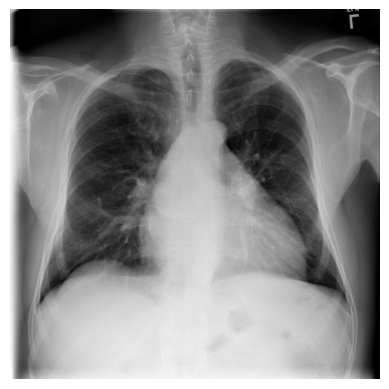

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Common 'mode' outputs: - "L": Grayscale (1 channel, 8-bit), - "RGB": True color (3 channels: Red, Green, Blue)
# - "RGBA": True color with transparency (4 channels)
# - "CMYK": Color separation (4 channels: Cyan, Magenta, Yellow, Black)

# Image path
image_path = "/content/images_all/00000001_000.png"

# Load the image
with Image.open(image_path) as img:
    width, height = img.size
    mode = img.mode  # Image mode (indicates the channels)
    print(f"Width: {width} pixels, Height: {height} pixels, Mode: {mode}")

# Load the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display using Matplotlib
plt.imshow(img, cmap="gray")
plt.axis('off')  # Remove axes
plt.show()

# Data Cleaning and Preparation

Adjust Column Names and Remove Unnecessary Columns

Adjust Column Names: As mentioned earlier, the column names may need to be adjusted to make access and manipulation easier in pandas.
Remove Extra Column: The column 'Unnamed: 11' appears to be an artifact without useful data and should be removed.
Split Complex Columns: The columns 'OriginalImage[Width,Height]' and 'OriginalImagePixelSpacing[x,y]' can be split into separate columns for width, height, and pixel spacing.

In [ ]:
# --- Step 5: Clean Column Names ---
# Standardize column names by removing special characters and spaces, and convert them to lowercase.

# Adjust column names: remove special characters, replace spaces with underscores, and convert to lowercase
filtered_labels_df.columns = (
    filtered_labels_df.columns
    .str.replace('[', '', regex=False)
    .str.replace(']', '', regex=False)
    .str.replace(' ', '_')
    .str.lower()
)

# Remove the 'unnamed:_11' column if it exists to clean up unnecessary data
if 'unnamed:_11' in filtered_labels_df.columns:
    filtered_labels_df.drop('unnamed:_11', axis=1, inplace=True)

# Display the updated column names for verification
print("Updated column names:", filtered_labels_df.columns)


Updated column names: Index(['image_index', 'finding_labels', 'follow-up_#', 'patient_id',
       'patient_age', 'patient_gender', 'view_position', 'originalimagewidth',
       'height', 'originalimagepixelspacingx', 'y'],
      dtype='object')


In [ ]:
filtered_labels_df.head()

,image_index,finding_labels,follow-up_#,patient_id,patient_age,patient_gender,view_position,originalimagewidth,height,originalimagepixelspacingx,y
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143


Rename and Convert Column Data Types

Rename and Convert Column Types:

.loc[]: This method is used to access rows and columns of a DataFrame. The syntax is .loc[rows, columns].

: In the first argument (before the comma), it means "select all rows." 'image_width' in the second argument means "select the column image_width." Therefore, filtered_labels_df.loc[:, 'image_width'] selects all rows from the image_width column.

In [ ]:
# --- Step 6: Refine and Standardize DataFrame ---
# Rename columns for clarity and standardize data types for numerical processing.

# Create a copy of the DataFrame to avoid SettingWithCopyWarning
filtered_labels_df = filtered_labels_df.copy()

# --- Subsection: Rename Columns ---
# Rename columns to improve clarity and consistency
filtered_labels_df.rename(columns={
    'originalimagewidth': 'image_width',
    'height': 'image_height',              # Corrected from 'originalimageheight' to 'height'
    'originalimagepixelspacingx': 'pixel_spacing_x',
    'y': 'pixel_spacing_y'                 # Corrected from 'originalimagepixelspacingy' to 'y'
}, inplace=True)

# --- Subsection: Convert Columns to Numeric ---
# Convert columns related to image dimensions and pixel spacing to float
filtered_labels_df['image_width'] = filtered_labels_df['image_width'].astype(float)
filtered_labels_df['image_height'] = filtered_labels_df['image_height'].astype(float)
filtered_labels_df['pixel_spacing_x'] = filtered_labels_df['pixel_spacing_x'].astype(float)
filtered_labels_df['pixel_spacing_y'] = filtered_labels_df['pixel_spacing_y'].astype(float)

# Display the updated data types of the DataFrame columns
print("Data types after conversion:")
print(filtered_labels_df.dtypes)

Data types after conversion:
image_index         object
finding_labels      object
follow-up_#          int64
patient_id           int64
patient_age          int64
patient_gender      object
view_position       object
image_width        float64
image_height       float64
pixel_spacing_x    float64
pixel_spacing_y    float64
dtype: object


# Analyze and Process Pathology Labels

Identify Unique Pathologies

' '.join(...): Joins all the values in the list into a single string, separating them with a space (' '). This creates a large string called all_text, which contains all the text from the column.
- [^...]: The ^ inside the brackets negates the set.
- str.split('|'): Splits the values in the finding_labels column into multiple pathologies using the delimiter |.
- explode(): Expands the resulting lists from the split, creating a separate row for each pathology.
- unique(): Retrieves the unique pathology values found in the dataset.
- label.strip(): Removes whitespace at the beginning and end of each label. This is useful for cleaning the data, as sometimes unwanted spaces may remain around words after splitting.

In [ ]:
# --- Step 7: Analyze and Process Label Delimiters ---
# Identify delimiters in the label column and process the unique pathologies.

import re
from collections import Counter

# --- Subsection: Identify Delimiters ---
# Concatenate all labels into a single string for analysis
all_labels = ' '.join(filtered_labels_df['finding_labels'].values)

# Find all non-alphanumeric characters (potential delimiters) in the labels
delimiters = re.findall(r'[^a-zA-Z0-9\s]', all_labels)

# Count the frequency of each delimiter
delimiter_count = Counter(delimiters)

# Display the delimiters and their counts
print("Delimiters found in labels:", delimiter_count)

# Check if the primary delimiter is '|'
if '|' in delimiter_count:
    print("\nThe primary delimiter is '|'.")
else:
    print("\nDelimiters other than '|' were found. Please verify the consistency of the data.")

# --- Subsection: Extract Unique Pathologies ---
# Split the 'finding_labels' column using the identified delimiter '|'
unique_labels = filtered_labels_df['finding_labels'].str.split('|').explode().unique()

# Remove leading/trailing spaces from each label
unique_labels = [label.strip() for label in unique_labels]

# Optionally, rename specific labels if needed
# For example, replacing 'No Finding' with 'No_Finding':
# unique_labels = [label.replace('No Finding', 'No_Finding') for label in unique_labels]

# Display the unique pathologies identified in the dataset
print("\nUnique pathologies found in the dataset:")
for label in unique_labels:
    print(label)

Delimiters found in labels: Counter({'|': 28583, '_': 3328})

The primary delimiter is '|'.

Unique pathologies found in the dataset:
Cardiomegaly
Emphysema
Effusion
No Finding
Hernia
Infiltration
Mass
Nodule
Atelectasis
Pneumothorax
Pleural_Thickening
Pneumonia
Fibrosis
Edema
Consolidation


# Create Binary Columns for Each Pathology

This code iterates over all pathologies identified in unique_labels and, for each pathology, creates a new column in the DataFrame.

lambda x: 1 if label in x else 0: The lambda function checks if the pathology is present in the string x (which represents the labels of an image). If yes, it assigns 1; otherwise, 0.

In [ ]:
# --- Step 8: Create Binary Columns for Each Pathology ---
# Generate binary indicator columns for each pathology based on the 'finding_labels' column.

# --- Subsection: Create Binary Columns ---
# Loop through each unique pathology label and create a binary column indicating its presence
for label in unique_labels:
    filtered_labels_df[label] = filtered_labels_df['finding_labels'].apply(lambda x: 1 if label in x else 0)

# --- Subsection: Rename 'No Finding' Column ---
# Rename the 'No Finding' column to 'No_Finding' for consistency in column naming
if 'No Finding' in filtered_labels_df.columns:
    filtered_labels_df.rename(columns={'No Finding': 'No_Finding'}, inplace=True)

# Update the list of unique labels to reflect the renamed column
unique_labels = [label.replace('No Finding', 'No_Finding') for label in unique_labels]

# --- Subsection: Summarize Pathology Occurrences ---
# Display the total occurrences of each pathology in the dataset
print("\nOccurrences per pathology:")
print(filtered_labels_df[unique_labels].sum())


Occurrences per pathology:
Cardiomegaly           2664
Emphysema              2470
Effusion              12938
No_Finding            58821
Hernia                  211
Infiltration          19296
Mass                   5596
Nodule                 6200
Atelectasis           11270
Pneumothorax           5209
Pleural_Thickening     3328
Pneumonia              1388
Fibrosis               1640
Edema                  2206
Consolidation          4465
dtype: int64


In [ ]:
# Display the first few rows with the new binary columns
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
filtered_labels_df.head()

,image_index,finding_labels,follow-up_#,patient_id,patient_age,patient_gender,view_position,image_width,image_height,pixel_spacing_x,pixel_spacing_y,Cardiomegaly,Emphysema,Effusion,No_Finding,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682.0,2749.0,0.143,0.143,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894.0,2729.0,0.143,0.143,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500.0,2048.0,0.168,0.168,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500.0,2048.0,0.171,0.171,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582.0,2991.0,0.143,0.143,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# --- Step 9: Filter Target Pathologies ---
# Define the pathologies of interest and filter the dataset accordingly.

# --- Subsection: Define Target Pathologies ---
# Specify the list of pathologies to focus on in the analysis
target_pathologies = ['Atelectasis', 'Cardiomegaly', 'Emphysema', 'Effusion',
                      'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']

# --- Subsection: Filter Labels and Update DataFrame ---
# Retain only the labels that are in the target pathologies list
filtered_labels_df['finding_labels'] = filtered_labels_df['finding_labels'].apply(
    lambda x: '|'.join([label for label in x.split('|') if label in target_pathologies])
)

# --- Subsection: Remove Rows Without Target Pathologies ---
# Exclude rows where 'finding_labels' is empty after filtering
filtered_labels_df = filtered_labels_df[filtered_labels_df['finding_labels'] != ""]

# --- Subsection: Reset DataFrame Index ---
# Reset the index of the DataFrame after filtering
filtered_labels_df.reset_index(drop=True, inplace=True)

In [ ]:
# --- Step 10: Count Samples Per Pathology ---
# Summarize the number of samples for each target pathology in the updated DataFrame.

# Count the occurrences of each pathology in the target pathologies
pathology_counts = filtered_labels_df[target_pathologies].sum()

# Display the number of samples for each pathology
print("Number of samples per pathology:")
print(pathology_counts)

Number of samples per pathology:
Atelectasis     11270
Cardiomegaly     2664
Emphysema        2470
Effusion        12938
Mass             5596
Nodule           6200
Pneumonia        1388
Pneumothorax     5209
dtype: int64


In [ ]:
# --- Step 11: Verify Updated DataFrame ---
# Inspect the updated DataFrame to ensure proper adjustments.

# Display the first few rows of the updated DataFrame
print("First rows of the DataFrame after adjustment:")
print(filtered_labels_df[['image_index', 'finding_labels'] + target_pathologies].head())

# Check for rows without labels
empty_labels = filtered_labels_df[filtered_labels_df['finding_labels'] == ""]
print("Rows without labels (should be empty):")
print(empty_labels)

First rows of the DataFrame after adjustment:
        image_index          finding_labels  Atelectasis  Cardiomegaly  \
0  00000001_000.png            Cardiomegaly            0             1   
1  00000001_001.png  Cardiomegaly|Emphysema            0             1   
2  00000001_002.png   Cardiomegaly|Effusion            0             1   
3  00000004_000.png             Mass|Nodule            0             0   
4  00000005_007.png                Effusion            0             0   

   Emphysema  Effusion  Mass  Nodule  Pneumonia  Pneumothorax  
0          0         0     0       0          0             0  
1          1         0     0       0          0             0  
2          0         1     0       0          0             0  
3          0         0     1       1          0             0  
4          0         1     0       0          0             0  
Rows without labels (should be empty):
Empty DataFrame
Columns: [image_index, finding_labels, follow-up_#, patient_id, patien

Adjust the Table to Consider Only the Pathologies of Interest

In [ ]:
# --- Step 12: Filter Labels to Target Pathologies ---
# Keep only the labels related to the target pathologies and update the DataFrame.

# Define the list of target pathologies
target_pathologies = ['Atelectasis', 'Cardiomegaly', 'Emphysema', 'Effusion', 'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']

# Function to filter labels in the `finding_labels` column
def filter_labels(label_str):
    labels = label_str.split('|')  # Split labels using the delimiter
    filtered_labels = [label for label in labels if label in target_pathologies]  # Keep only the target pathologies
    return '|'.join(filtered_labels)  # Recombine the filtered labels

# Apply the function to the `finding_labels` column
filtered_labels_df['finding_labels'] = filtered_labels_df['finding_labels'].apply(filter_labels)

# Optional: Filter rows where `finding_labels` is empty, as no relevant pathology is present
# filtered_labels_df = filtered_labels_df[filtered_labels_df['finding_labels'] != ""]

# Confirm the changes by displaying the first 20 rows of the updated column
print("First rows after updating finding_labels:")
print(filtered_labels_df[['image_index', 'finding_labels']].head(20))


First rows after updating finding_labels:
         image_index                   finding_labels
0   00000001_000.png                     Cardiomegaly
1   00000001_001.png           Cardiomegaly|Emphysema
2   00000001_002.png            Cardiomegaly|Effusion
3   00000004_000.png                      Mass|Nodule
4   00000005_007.png                         Effusion
5   00000008_000.png                     Cardiomegaly
6   00000008_002.png                           Nodule
7   00000009_000.png                        Emphysema
8   00000011_000.png                         Effusion
9   00000011_006.png                      Atelectasis
10  00000012_000.png                    Effusion|Mass
11  00000013_001.png           Emphysema|Pneumothorax
12  00000013_002.png           Emphysema|Pneumothorax
13  00000013_004.png  Effusion|Emphysema|Pneumothorax
14  00000013_005.png           Emphysema|Pneumothorax
15  00000013_006.png                         Effusion
16  00000013_010.png  Effusion|Pneumonia

In [ ]:
filtered_labels_df

,image_index,finding_labels,follow-up_#,patient_id,patient_age,patient_gender,view_position,image_width,image_height,pixel_spacing_x,pixel_spacing_y,Cardiomegaly,Emphysema,Effusion,No_Finding,Hernia,Infiltration,Mass,Nodule,Atelectasis,Pneumothorax,Pleural_Thickening,Pneumonia,Fibrosis,Edema,Consolidation
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682.0,2749.0,0.143000,0.143000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894.0,2729.0,0.143000,0.143000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500.0,2048.0,0.168000,0.168000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,00000004_000.png,Mass|Nodule,0,4,82,M,AP,2500.0,2048.0,0.168000,0.168000,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,00000005_007.png,Effusion,7,5,70,F,PA,2566.0,2681.0,0.143000,0.143000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35784,00030786_003.png,Cardiomegaly|Effusion|Emphysema|Pneumothorax,3,30786,61,F,AP,3056.0,2544.0,0.139000,0.139000,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0
35785,00030786_004.png,Cardiomegaly|Effusion|Emphysema|Pneumothorax,4,30786,61,F,AP,3056.0,2544.0,0.139000,0.139000,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0
35786,00030786_005.png,Cardiomegaly|Effusion|Emphysema,5,30786,61,F,AP,3056.0,2544.0,0.139000,0.139000,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
35787,00030793_000.png,Mass|Nodule,0,30793,58,F,PA,2021.0,2021.0,0.194311,0.194311,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [ ]:
# --- Optional: Count Samples Per Pathology ---
# Ensure the counts remain accurate after any updates to the DataFrame.

# Count the number of samples for each target pathology in the current DataFrame
pathology_counts = filtered_labels_df[target_pathologies].sum()

# Display the updated number of samples for each pathology
print("Number of samples per pathology in the current table:")
print(pathology_counts)

Number of samples per pathology in the current table:
Atelectasis     11270
Cardiomegaly     2664
Emphysema        2470
Effusion        12938
Mass             5596
Nodule           6200
Pneumonia        1388
Pneumothorax     5209
dtype: int64


In [ ]:
# --- Step 13: Check and Filter Empty Labels ---
# Remove rows with empty `finding_labels` and validate the result.

# Filter out rows where `finding_labels` is empty
filtered_labels_df = filtered_labels_df[filtered_labels_df['finding_labels'] != ""]

# Verify there are no rows with empty `finding_labels`
print("Rows with empty finding_labels (should be empty now):")
print(filtered_labels_df[filtered_labels_df['finding_labels'] == ""])

Rows with empty finding_labels (should be empty now):
Empty DataFrame
Columns: [image_index, finding_labels, follow-up_#, patient_id, patient_age, patient_gender, view_position, image_width, image_height, pixel_spacing_x, pixel_spacing_y, Cardiomegaly, Emphysema, Effusion, No_Finding, Hernia, Infiltration, Mass, Nodule, Atelectasis, Pneumothorax, Pleural_Thickening, Pneumonia, Fibrosis, Edema, Consolidation]
Index: []


In [ ]:
# --- Step 14: Compare Counts for 'No Finding' ---
# Compare the original and processed counts for the 'No Finding' label to ensure consistency.

# Count the original number of rows with the 'No Finding' label in the unprocessed DataFrame
original_no_finding_count = labels_df[labels_df['Finding Labels'] == "No Finding"].shape[0]

# Count the number of 'No_Finding' occurrences in the processed DataFrame
processed_no_finding_count = filtered_labels_df['No_Finding'].sum()

# Display the comparison of original and processed counts
print(f"Original: {original_no_finding_count}, Processed: {processed_no_finding_count}")

Original: 60361, Processed: 0


In [ ]:
print(filtered_labels_df[filtered_labels_df['No_Finding'] == 1].head())

Empty DataFrame
Columns: [image_index, finding_labels, follow-up_#, patient_id, patient_age, patient_gender, view_position, image_width, image_height, pixel_spacing_x, pixel_spacing_y, Cardiomegaly, Emphysema, Effusion, No_Finding, Hernia, Infiltration, Mass, Nodule, Atelectasis, Pneumothorax, Pleural_Thickening, Pneumonia, Fibrosis, Edema, Consolidation]
Index: []


#  Dividir o Dataset em Treino, Validação e Teste

In [ ]:
# --- Step 15: Dataset Splitting ---
# Split the dataset into training, validation, and test sets using GroupShuffleSplit
# to ensure patients are not shared across different sets.

from sklearn.model_selection import GroupShuffleSplit

# --- Subsection: Define Target Pathologies ---
# Specify the pathologies of interest for classification
target_pathologies = ['Atelectasis', 'Cardiomegaly', 'Emphysema', 'Effusion',
                      'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']

# --- Subsection: Prepare Data for Splitting ---
# Features (X) exclude the target pathologies, while labels (y) include them
X = filtered_labels_df.drop(columns=target_pathologies)
y = filtered_labels_df[target_pathologies]

# Use 'patient_id' to ensure patient-level grouping during splitting
groups = filtered_labels_df['patient_id']

# --- Subsection: Split Train+Validation and Test Sets ---
# Create a GroupShuffleSplit object for splitting the data
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the first split: train+validation and test
train_val_indices, test_indices = next(gss.split(X, y, groups=groups))

# Extract train+validation and test sets
X_train_val = X.iloc[train_val_indices]
y_train_val = y.iloc[train_val_indices]
groups_train_val = groups.iloc[train_val_indices]

X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]
groups_test = groups.iloc[test_indices]

# --- Subsection: Split Train+Validation into Train and Validation Sets ---
# Further split the train+validation set into separate training and validation sets
gss_val = GroupShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

train_indices, val_indices = next(gss_val.split(X_train_val, y_train_val, groups=groups_train_val))

# Extract training and validation sets
X_train = X_train_val.iloc[train_indices]
y_train = y_train_val.iloc[train_indices]
groups_train = groups_train_val.iloc[train_indices]

X_val = X_train_val.iloc[val_indices]
y_val = y_train_val.iloc[val_indices]
groups_val = groups_train_val.iloc[val_indices]

In [ ]:
# --- Step 16: Verify Dataset Splits ---
# Check the size of each dataset split to ensure proper partitioning.

# Verify the size of the training, validation, and test sets
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 25646
Validation set size: 2903
Test set size: 7240


In [ ]:
# --- Step 17: Verify Patient Intersection Between Splits ---
# Ensure that patient IDs do not overlap between training, validation, and test sets.

# Extract unique patient IDs from each dataset split
train_patient_ids = set(X_train['patient_id'])
val_patient_ids = set(X_val['patient_id'])
test_patient_ids = set(X_test['patient_id'])

# Check intersections between dataset splits
common_train_val = train_patient_ids.intersection(val_patient_ids)
common_train_test = train_patient_ids.intersection(test_patient_ids)
common_val_test = val_patient_ids.intersection(test_patient_ids)

# Display the number of overlapping patient IDs between splits
print(f"Number of patients in common between training and validation: {len(common_train_val)}")
print(f"Number of patients in common between training and test: {len(common_train_test)}")
print(f"Number of patients in common between validation and test: {len(common_val_test)}")

Number of patients in common between training and validation: 0
Number of patients in common between training and test: 0
Number of patients in common between validation and test: 0


Check the Distribution of Pathologies in Each Set

In [ ]:
# --- Step 18: Check Pathology Distribution Across Splits ---
# Define a function to check the distribution of pathologies in each dataset split.

# Function to verify the distribution of pathologies in a given dataset
def check_distribution(y_set, set_name):
    print(f"Pathology distribution in the {set_name} set:")
    print(y_set.sum())  # Sum each column to calculate the total occurrences for each pathology
    print("\n")

# Check the distribution of pathologies in each dataset split
check_distribution(y_train, "Training")
check_distribution(y_val, "Validation")
check_distribution(y_test, "Test")

Pathology distribution in the Training set:
Atelectasis     8179
Cardiomegaly    1931
Emphysema       1748
Effusion        9153
Mass            4093
Nodule          4470
Pneumonia       1038
Pneumothorax    3634
dtype: int64


Pathology distribution in the Validation set:
Atelectasis      949
Cardiomegaly     220
Emphysema        223
Effusion        1112
Mass             406
Nodule           438
Pneumonia        115
Pneumothorax     402
dtype: int64


Pathology distribution in the Test set:
Atelectasis     2142
Cardiomegaly     513
Emphysema        499
Effusion        2673
Mass            1097
Nodule          1292
Pneumonia        235
Pneumothorax    1173
dtype: int64




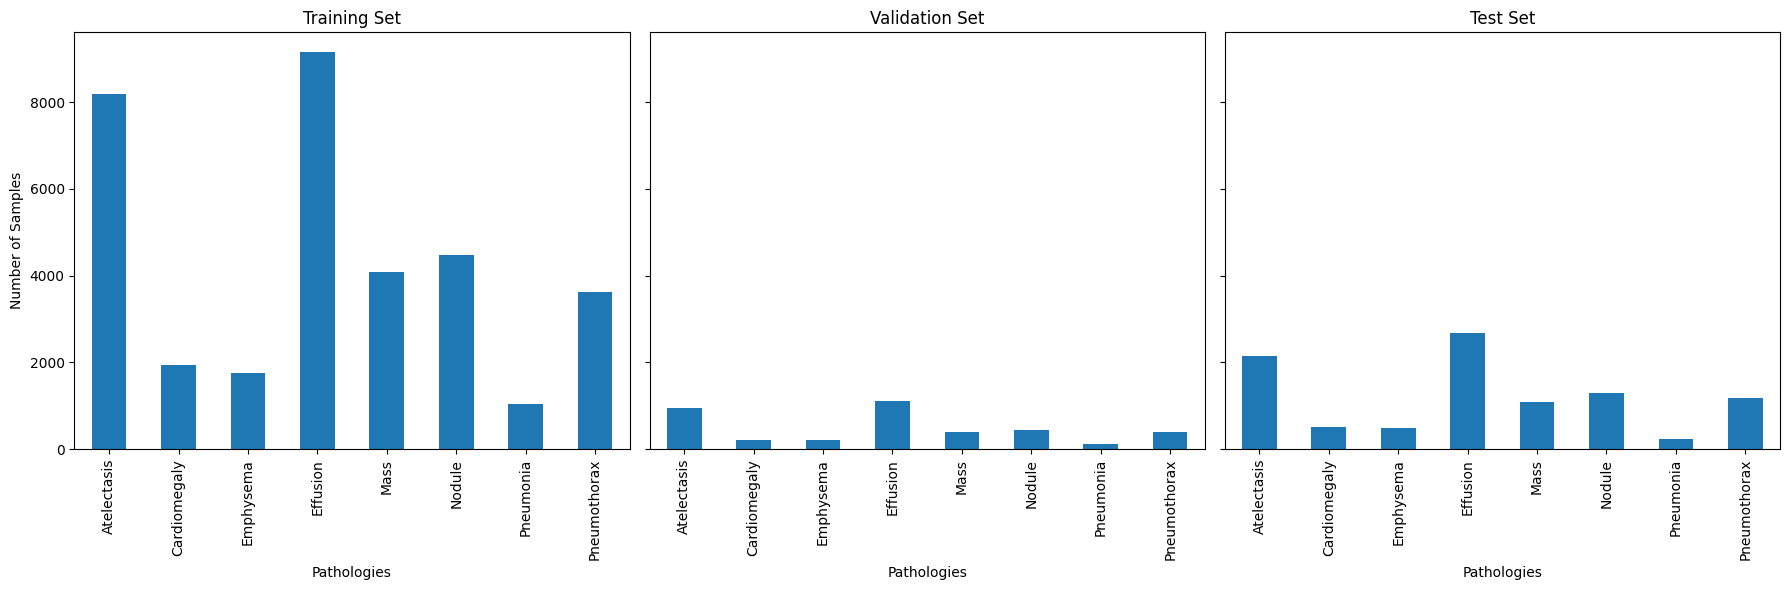

In [ ]:
# --- Step 19: Visualize Pathology Distribution Side by Side ---
# Use subplots to display pathology distributions for training, validation, and test sets side by side.

import matplotlib.pyplot as plt

# Create a figure with subplots for side-by-side bar plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# --- Subsection: Training Set ---
# Plot the distribution of pathologies in the training set
y_train.sum().plot(kind='bar', ax=axes[0], title='Training Set')
axes[0].set_xlabel('Pathologies')
axes[0].set_ylabel('Number of Samples')

# --- Subsection: Validation Set ---
# Plot the distribution of pathologies in the validation set
y_val.sum().plot(kind='bar', ax=axes[1], title='Validation Set')
axes[1].set_xlabel('Pathologies')

# --- Subsection: Test Set ---
# Plot the distribution of pathologies in the test set
y_test.sum().plot(kind='bar', ax=axes[2], title='Test Set')
axes[2].set_xlabel('Pathologies')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


# Balance the Training Set

Apply balancing only to the training set.

In [ ]:
# --- Step 20: Combine Features and Labels for Training Set ---
# Merge the feature (X_train) and label (y_train) DataFrames for easier processing.

# Combine X_train and y_train into a single DataFrame
train_df = pd.concat([X_train, y_train], axis=1)

# The resulting DataFrame `train_df` will contain both the features and the target pathologies.

In [ ]:
# --- Step 21: Verify Combined DataFrame ---
# Inspect the combined DataFrame for training set to ensure features and labels are correctly merged.

print("Preview of the combined training set:")
print(train_df.head())

Preview of the combined training set:
        image_index finding_labels  follow-up_#  patient_id  patient_age  \
3  00000004_000.png    Mass|Nodule            0           4           82   
4  00000005_007.png       Effusion            7           5           70   
7  00000009_000.png      Emphysema            0           9           73   
8  00000011_000.png       Effusion            0          11           75   
9  00000011_006.png    Atelectasis            6          11           75   

  patient_gender view_position  image_width  image_height  pixel_spacing_x  \
3              M            AP       2500.0        2048.0            0.168   
4              F            PA       2566.0        2681.0            0.143   
7              M            PA       2992.0        2991.0            0.143   
8              M            PA       2638.0        2449.0            0.143   
9              M            PA       2992.0        2991.0            0.143   

   pixel_spacing_y  No_Finding  Hern

Balance the training set

In [ ]:
# --- Step 22: Balance the Training Dataset ---
# Perform oversampling or undersampling to balance the training dataset for each target pathology.

from sklearn.utils import resample

# Initialize the final balanced DataFrame
balanced_train_df = pd.DataFrame()

# Define the desired number of samples per class
target_sample_size = 6000  # Adjust this number as needed for your dataset

# Loop through each target pathology to balance the dataset
for pathology in target_pathologies:
    # Filter samples that contain the specific pathology
    pathology_df = train_df[train_df[pathology] == 1]

    # Apply oversampling if the count is less than the target sample size
    if len(pathology_df) < target_sample_size:
        pathology_df_resampled = resample(pathology_df,
                                          replace=True,  # Allow duplicates for oversampling
                                          n_samples=target_sample_size,
                                          random_state=42)
    # Apply undersampling if the count is greater than the target sample size
    elif len(pathology_df) > target_sample_size:
        pathology_df_resampled = resample(pathology_df,
                                          replace=False,  # Do not allow duplicates for undersampling
                                          n_samples=target_sample_size,
                                          random_state=42)
    else:
        # If the count matches the target, keep the samples as is
        pathology_df_resampled = pathology_df.copy()

    # Add the resampled DataFrame to the balanced training DataFrame
    balanced_train_df = pd.concat([balanced_train_df, pathology_df_resampled])

# Remove duplicates to ensure no repeated samples
balanced_train_df = balanced_train_df.drop_duplicates(subset=['image_index'])

In [ ]:
# --- Step 23: Verify Duplicate Removal ---
# Check the number of duplicate samples removed from the balanced training dataset.

# Count the number of duplicate rows based on the 'image_index' column
num_duplicates = balanced_train_df.duplicated(subset=['image_index']).sum()

# Display the number of duplicates found
print(f"Number of duplicates in the balanced dataset: {num_duplicates}")

Number of duplicates in the balanced dataset: 0


In [ ]:
# --- Step 24: Verify Size of Balanced Training Set ---
# Check the size of the balanced training dataset after duplicate removal.

# Display the total number of samples in the balanced training set
print(f"Size of the balanced training set after removing duplicates: {len(balanced_train_df)}")

Size of the balanced training set after removing duplicates: 20639


Verificar a Distribuição das Classes no Conjunto Balanceado


In [ ]:
# --- Step 25: Separate Featurs and Labels ---
# Extract features and labels from the balanced training dataset for model input.

# Separate features (X) from the balanced training DataFrame
X_train_balanced = balanced_train_df[X_train.columns]

# Separate labels (y) for the target pathologies
y_train_balanced = balanced_train_df[target_pathologies]

# --- Step 26: Verify Class Distribution ---
# Check the distribution of pathologies in the balanced training set to ensure balance.

print("Distribution of pathologies in the balanced training set:")
print(y_train_balanced.sum())

Distribution of pathologies in the balanced training set:
Atelectasis     6714
Cardiomegaly    1861
Emphysema       1711
Effusion        7261
Mass            3459
Nodule          3612
Pneumonia       1036
Pneumothorax    3173
dtype: int64


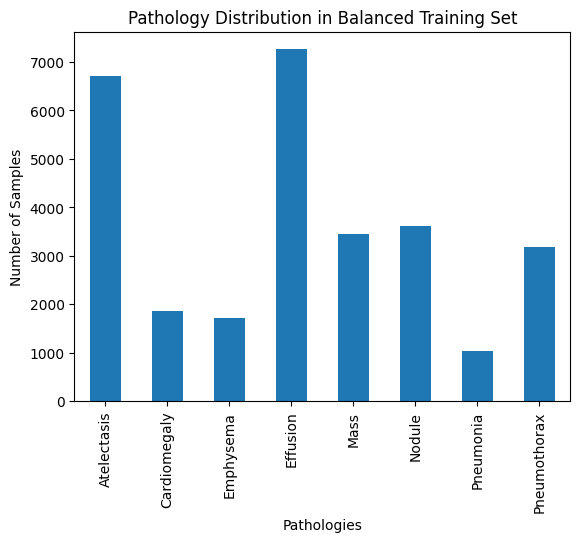

In [ ]:
# --- Step 27: Visualize Class Distribution in Balanced Training Set ---
# Create a bar plot to visualize the distribution of pathologies in the balanced training set.

# Plot the distribution of pathologies in the balanced training set
y_train_balanced.sum().plot(kind='bar', title='Pathology Distribution in Balanced Training Set')
plt.xlabel('Pathologies')
plt.ylabel('Number of Samples')
plt.show()

Prepare the Validation and Test Sets

The validation and test sets remain unchanged and should reflect the real distribution of the data.

In [ ]:
# --- Step 28: Combine Validation and Test Sets ---
# Combine features and labels for validation and test sets for easier analysis.

# Combine validation features (X_val) and labels (y_val)
val_df = pd.concat([X_val, y_val], axis=1)

# Combine test features (X_test) and labels (y_test)
test_df = pd.concat([X_test, y_test], axis=1)

# Display a preview of the validation set
print("Preview of the validation set:")
#print(val_df.head())

# Display a preview of the test set
print("Preview of the test set:")
#print(test_df.head())

Preview of the validation set:
Preview of the test set:


Proceed with Preprocessing and Training

We can now move forward with preprocessing the images and training the model using balanced_train_df for training, and val_df and test_df for validation and testing, respectively.

In [ ]:
# --- Step 29: Access Image Paths and Labels ---
# Extract image paths and corresponding labels for training, validation, and test sets.

# --- Subsection: Training Set ---
# Access image paths and labels for the balanced training set
train_image_paths = balanced_train_df['image_index'].values
train_labels = y_train_balanced.values

# --- Subsection: Validation Set ---
# Access image paths and labels for the validation set
val_image_paths = val_df['image_index'].values
val_labels = y_val.values

# --- Subsection: Test Set ---
# Access image paths and labels for the test set
test_image_paths = test_df['image_index'].values
test_labels = y_test.values

# Verify the first few image paths and labels for training
print("First few training image paths and labels:")
print(train_image_paths[:5])
print(train_labels[:5])

First few training image paths and labels:
['00030011_000.png' '00010828_061.png' '00020229_001.png'
 '00012045_044.png' '00012750_002.png']
[[1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0]]


In [ ]:
# --- Step 30: Verify Image Paths Existence ---
# Ensure that all image paths in the datasets correspond to actual files on disk.

import os

# Define the directory where the images are stored
consolidated_dir = '/content/images_all'  # Ensure this path is correct

# Function to verify if image files exist
def check_image_paths(image_paths, set_name):
    missing_files = []  # List to store missing file paths
    for img in image_paths:
        img_path = os.path.join(consolidated_dir, img)
        if not os.path.isfile(img_path):
            missing_files.append(img)

    # Print the result of the check
    if missing_files:
        print(f"{len(missing_files)} files not found in the {set_name} set.")
        print(f"Examples of missing files: {missing_files[:5]}")  # Show a few examples of missing files
    else:
        print(f"All files in the {set_name} set were found.")

# Verify image paths in each dataset
check_image_paths(train_image_paths, 'Training')
check_image_paths(val_image_paths, 'Validation')
check_image_paths(test_image_paths, 'Test')

All files in the Training set were found.
All files in the Validation set were found.
All files in the Test set were found.


In [ ]:
# --- Step 31: Verify Alignment Between Features and Labels ---
# Ensure that the indices of features (X) and labels (y) are properly aligned in all datasets.

# Check alignment in the balanced training set
assert all(balanced_train_df.index == y_train_balanced.index), \
    "Misalignment between X and y in the balanced training set"

# Check alignment in the validation set
assert all(val_df.index == y_val.index), \
    "Misalignment between X and y in the validation set"

# Check alignment in the test set
assert all(test_df.index == y_test.index), \
    "Misalignment between X and y in the test set"

# If no errors, print confirmation
print("Labels are properly aligned with features in all datasets.")

Labels are properly aligned with features in all datasets.


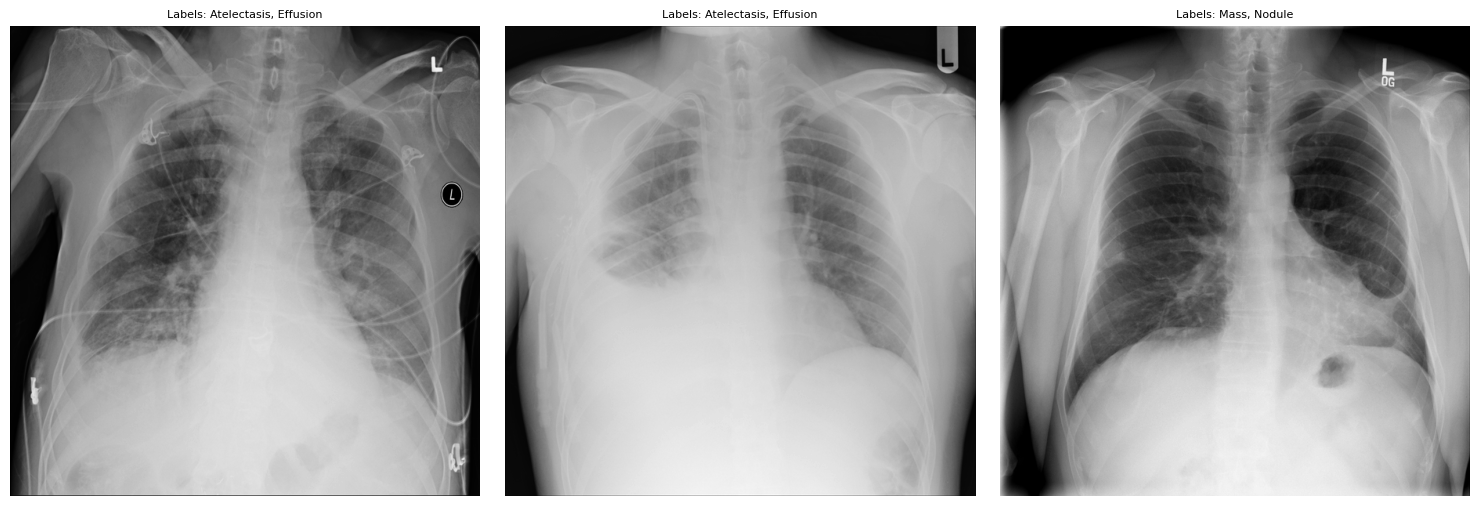

In [ ]:
# --- Step 32: Visualize Sample Images with Labels ---
# Display a random selection of images from the training set alongside their corresponding labels.

import random
import matplotlib.pyplot as plt
import cv2
import os

# --- Subsection: Function to Show Images Side by Side ---
# Define a function to display multiple images with their labels
def show_images_side_by_side(image_names, labels_list):
    plt.figure(figsize=(15, 5))  # Set the figure size (width, height)
    for i, (image_name, labels) in enumerate(zip(image_names, labels_list)):
        img_path = os.path.join(consolidated_dir, image_name)  # Construct the image path
        if os.path.isfile(img_path):
            # Read the image in grayscale mode
            img = cv2.imread(img_path, 0)
            plt.subplot(1, len(image_names), i + 1)  # Configure subplot
            plt.imshow(img, cmap='gray')
            plt.title(f"Labels: {', '.join(labels)}", fontsize=8)  # Display labels
            plt.axis('off')
        else:
            print(f"Image {image_name} not found.")  # Handle missing files
    plt.tight_layout()  # Adjust spacings between subplots
    plt.show()

# --- Subsection: Select Random Samples ---
# Select a random sample of images and their labels from the training set
sample_indices = random.sample(range(len(train_image_paths)), 3)
sample_image_names = [train_image_paths[idx] for idx in sample_indices]
sample_labels = [
    [pathology for i, pathology in enumerate(target_pathologies) if train_labels[idx][i] == 1]
    for idx in sample_indices
]

# --- Subsection: Display Images ---
# Show the selected images alongside their labels
show_images_side_by_side(sample_image_names, sample_labels)

Define the Minority Classes Based on Updated Counts

In [ ]:
# --- Step 33: Analyze Class Distributions ---
# Dynamically calculate and analyze class distributions in the balanced training set.

# Get class counts from the balanced training labels
class_counts = y_train_balanced.sum().to_dict()

# Define a threshold to categorize minority and majority classes
threshold = 3000

# Identify minority classes (below the threshold)
minority_classes = {cls: count for cls, count in class_counts.items() if count < threshold}

# Identify majority classes (above or equal to the threshold)
majority_classes = {cls: count for cls, count in class_counts.items() if count >= threshold}

# --- Subsection: Display Class Counts ---
# Print the counts for all classes
print("Class counts in the balanced training set:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

# --- Subsection: Display Minority Classes ---
# Print the counts for minority classes
print("\nMinority classes and their counts:")
for cls, count in minority_classes.items():
    print(f"{cls}: {count}")

# --- Subsection: Display Majority Classes ---
# Print the counts for majority classes
print("\nMajority classes and their counts:")
for cls, count in majority_classes.items():
    print(f"{cls}: {count}")

Class counts in the balanced training set:
Atelectasis: 6714
Cardiomegaly: 1861
Emphysema: 1711
Effusion: 7261
Mass: 3459
Nodule: 3612
Pneumonia: 1036
Pneumothorax: 3173

Minority classes and their counts:
Cardiomegaly: 1861
Emphysema: 1711
Pneumonia: 1036

Majority classes and their counts:
Atelectasis: 6714
Effusion: 7261
Mass: 3459
Nodule: 3612
Pneumothorax: 3173


In [ ]:
# --- Step 34: Import Required Libraries ---
# Import libraries for image preprocessing, model training, and evaluation.

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt  # For visualizing images or results

# Additional imports for metrics and evaluation
from sklearn.metrics import classification_report, roc_auc_score

Set Up the Data Augmentation Generators

In [ ]:
# --- Step 35: Define Data Augmentation Strategies ---
# Apply different augmentation strategies for minority and majority classes
# to balance the dataset and improve model generalization.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- Subsection: Aggressive Augmentation for Minority Classes ---
# Use stronger transformations to create more diverse samples for underrepresented classes.
minority_datagen = ImageDataGenerator(
    rotation_range=30,          # Allow larger rotations for variability
    width_shift_range=0.2,      # Enable significant horizontal shifts
    height_shift_range=0.2,     # Enable significant vertical shifts
    shear_range=0.2,         # Uncomment to add shear transformations (optional)
    #brightness_range=[0.9, 1.1],  # Uncomment to add brightness adjustments (optional)
    #channel_shift_range=20.0, # Uncomment to allow color channel adjustments (optional)
    zoom_range=0.15,             # Apply random zooming in and out
    fill_mode='nearest'         # Fill missing pixels with the nearest pixel values
)

# --- Subsection: Mild Augmentation for Majority Classes ---
# Apply lighter transformations to maintain the consistency of well-represented classes.
majority_datagen = ImageDataGenerator(
    rotation_range=10,          # Small rotations for slight variability
    width_shift_range=0.1,      # Enable minor horizontal shifts
    height_shift_range=0.1,     # Enable minor vertical shifts
    zoom_range=0.1,             # Apply limited zooming in and out
    fill_mode='nearest'         # Fill missing pixels with the nearest pixel values
)

Mixup Function

In [ ]:
# --- Step 36: Implement MixUp Data Augmentation ---
# MixUp combines pairs of images and their labels using linear interpolation
# to generate new augmented samples, improving model robustness.

import numpy as np

def mixup(image1, image2, label1, label2, alpha=0.4):
    """
    Perform MixUp augmentation by combining two images and their labels.

    Parameters:
        image1 (numpy array): The first image.
        image2 (numpy array): The second image.
        label1 (numpy array): The label corresponding to the first image.
        label2 (numpy array): The label corresponding to the second image.
        alpha (float): The parameter for the Beta distribution to determine the mixing ratio.

    Returns:
        mixed_image (numpy array): The resulting mixed image.
        mixed_label (numpy array): The resulting mixed label.
    """
    # Generate a mixing coefficient from the Beta distribution
    lam = np.random.beta(alpha, alpha)

    # Combine the two images using linear interpolation
    mixed_image = lam * image1 + (1 - lam) * image2

    # Combine the two labels using the same mixing ratio
    mixed_label = lam * label1 + (1 - lam) * label2

    return mixed_image, mixed_label

Map Class Indices

In [ ]:
# --- Step 37: Map Class Names to Indices ---
# Create a mapping of class names to their corresponding indices for consistent referencing.

# Map the class names to their respective indices
class_indices = {class_name: idx for idx, class_name in enumerate(target_pathologies)}

# Display the mapping of class names to indices
print("Class indices mapping:", class_indices)

Class indices mapping: {'Atelectasis': 0, 'Cardiomegaly': 1, 'Emphysema': 2, 'Effusion': 3, 'Mass': 4, 'Nodule': 5, 'Pneumonia': 6, 'Pneumothorax': 7}


Create the Custom Data Generator

In [ ]:
# --- Step 38: Create Custom Data Generator NORMALIZE -1 to 1---
# Custom data generator that applies specific data augmentation and MixUp based on class types.

from tensorflow.keras.applications.inception_v3 import preprocess_input

def custom_data_generator(image_paths, labels, batch_size, minority_classes, class_indices, datagen_minor, datagen_major, apply_mixup=True, mixup_prob=0.5):
    """
    Custom data generator for training that applies data augmentation and MixUp as needed.

    Parameters:
        image_paths (list): List of image file paths.
        labels (array): List of one-hot encoded labels.
        batch_size (int): Batch size for training.
        minority_classes (list): List of classes considered minority.
        class_indices (dict): Dictionary mapping class names to indices.
        datagen_minor (ImageDataGenerator): Data augmentation generator for minority classes.
        datagen_major (ImageDataGenerator): Data augmentation generator for majority classes.
        apply_mixup (bool): Whether to apply MixUp augmentation.
        mixup_prob (float): Probability of applying MixUp.

    Yields:
        batch_images (numpy array): Batch of augmented images.
        batch_labels (numpy array): Batch of labels corresponding to the images.
    """
    num_samples = len(image_paths)
    indices = np.arange(num_samples)

    while True:
        np.random.shuffle(indices)  # Shuffle indices for randomness

        # Create batches of images and labels
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            batch_images = []
            batch_labels = []

            # Process each sample in the current batch
            for idx in batch_indices:
                img_path = os.path.join(consolidated_dir, image_paths[idx])
                img = tf.keras.preprocessing.image.load_img(img_path, color_mode='grayscale', target_size=(299, 299))
                img_array = tf.keras.preprocessing.image.img_to_array(img)

                # Convert grayscale to RGB by repeating channels
                img_array = np.repeat(img_array, 3, axis=-1)  # Simulate 3 channels (RGB)

                label = labels[idx]

                # Apply data augmentation based on class (minority or majority)
                if any(label[class_indices[cls]] == 1 for cls in minority_classes):  # Check if it's a minority class
                    img_array = datagen_minor.random_transform(img_array)  # Apply minority class augmentation

                    # Apply MixUp with a certain probability for minority classes
                    if apply_mixup and len(batch_indices) > 1 and np.random.rand() < mixup_prob:
                        idx2 = np.random.choice([i for i in batch_indices if i != idx])  # Choose a different index for MixUp
                        img_path2 = os.path.join(consolidated_dir, image_paths[idx2])
                        img2 = tf.keras.preprocessing.image.load_img(img_path2, color_mode='grayscale', target_size=(299, 299))
                        img_array2 = tf.keras.preprocessing.image.img_to_array(img2)
                        img_array2 = np.repeat(img_array2, 3, axis=-1)
                        label2 = labels[idx2]

                        # Apply MixUp to the images and labels
                        img_array, label = mixup(img_array, img_array2, label, label2)
                else:
                    img_array = datagen_major.random_transform(img_array)  # Apply majority class augmentation

                # Normalize image to the range [-1, 1] using preprocess_input
                img_array = preprocess_input(img_array)

                batch_images.append(img_array)
                batch_labels.append(label)

            # Yield the batch of images and labels
            yield np.array(batch_images), np.array(batch_labels)

In [ ]:
# --- Step 38: Create Custom Data Generator NORMALIZE 0 to 1---
# Custom data generator that applies specific data augmentation and MixUp based on class types.

def custom_data_generator(image_paths, labels, batch_size, minority_classes, class_indices, datagen_minor, datagen_major, apply_mixup=True, mixup_prob=0.5):
    """
    Custom data generator for training that applies data augmentation and MixUp as needed.

    Parameters:
        image_paths (list): List of image file paths.
        labels (array): List of one-hot encoded labels.
        batch_size (int): Batch size for training.
        minority_classes (list): List of classes considered minority.
        class_indices (dict): Dictionary mapping class names to indices.
        datagen_minor (ImageDataGenerator): Data augmentation generator for minority classes.
        datagen_major (ImageDataGenerator): Data augmentation generator for majority classes.
        apply_mixup (bool): Whether to apply MixUp augmentation.
        mixup_prob (float): Probability of applying MixUp.

    Yields:
        batch_images (numpy array): Batch of augmented images.
        batch_labels (numpy array): Batch of labels corresponding to the images.
    """
    num_samples = len(image_paths)
    indices = np.arange(num_samples)

    while True:
        np.random.shuffle(indices)  # Shuffle indices for randomness

        # Create batches of images and labels
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            batch_images = []
            batch_labels = []

            # Process each sample in the current batch
            for idx in batch_indices:
                img_path = os.path.join(consolidated_dir, image_paths[idx])
                img = tf.keras.preprocessing.image.load_img(img_path, color_mode='grayscale', target_size=(299, 299))
                img_array = tf.keras.preprocessing.image.img_to_array(img)

                # Convert grayscale to RGB by repeating channels
                img_array = np.repeat(img_array, 3, axis=-1)  # Simulate 3 channels (RGB)

                label = labels[idx]

                # Apply data augmentation based on class (minority or majority)
                if any(label[class_indices[cls]] == 1 for cls in minority_classes):  # Check if it's a minority class
                    img_array = datagen_minor.random_transform(img_array)  # Apply minority class augmentation

                    # Apply MixUp with a certain probability for minority classes
                    if apply_mixup and len(batch_indices) > 1 and np.random.rand() < mixup_prob:
                        idx2 = np.random.choice([i for i in batch_indices if i != idx])  # Choose a different index for MixUp
                        img_path2 = os.path.join(consolidated_dir, image_paths[idx2])
                        img2 = tf.keras.preprocessing.image.load_img(img_path2, color_mode='grayscale', target_size=(299, 299))
                        img_array2 = tf.keras.preprocessing.image.img_to_array(img2)
                        img_array2 = np.repeat(img_array2, 3, axis=-1)
                        label2 = labels[idx2]

                        # Apply MixUp to the images and labels
                        img_array, label = mixup(img_array, img_array2, label, label2)
                else:
                    img_array = datagen_major.random_transform(img_array)  # Apply majority class augmentation

                # Normalize image to the range [0, 1]
                img_array = img_array / 255.0

                batch_images.append(img_array)
                batch_labels.append(label)

            # Yield the batch of images and labels
            yield np.array(batch_images), np.array(batch_labels)

In [ ]:
# --- Step 39: Verify Data Generator with New Resolution ---
# Configure the data generator with a new resolution and check the batch dimensions.

batch_size = 32  # Set the batch size for training

# Initialize the data generator for training with the new resolution and other configurations
train_generator = custom_data_generator(
    image_paths=train_image_paths,
    labels=train_labels,
    batch_size=batch_size,
    minority_classes=minority_classes,
    class_indices=class_indices,
    datagen_minor=minority_datagen,
    datagen_major=majority_datagen,
    apply_mixup=True,  # Do not / apply MixUp in this check
    mixup_prob=0.5  # MixUp probability, but it will not be applied here
)

# Verify the dimensions of the batch generated by the train_generator
train_images, train_labels = next(train_generator)

# Display the dimensions of the images and labels in the batch
print("Batch image dimensions:", train_images.shape)  # Expected: (batch_size, 299, 299, 3)
print("Batch label dimensions:", train_labels.shape)  # Expected: (batch_size, number of classes)


Batch image dimensions: (32, 299, 299, 3)
Batch label dimensions: (32, 8)


Augmented images for the minority class:


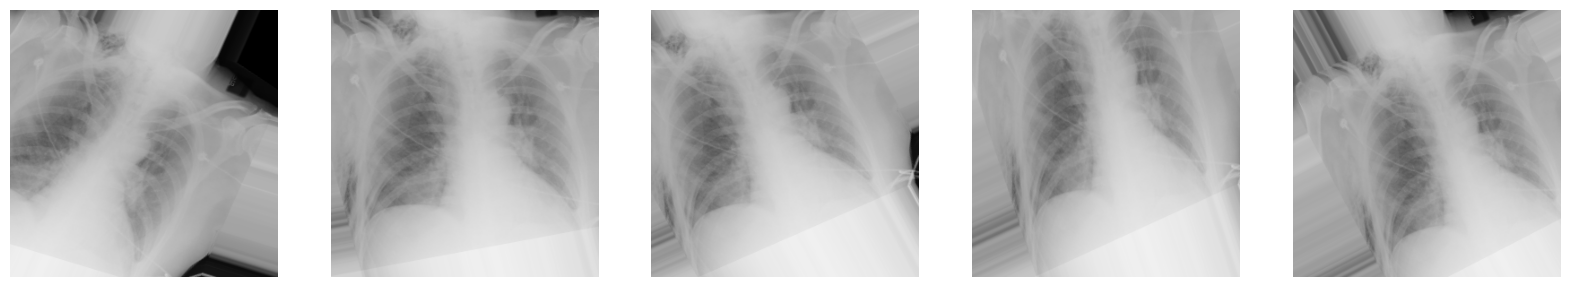

Augmented images for the majority class:


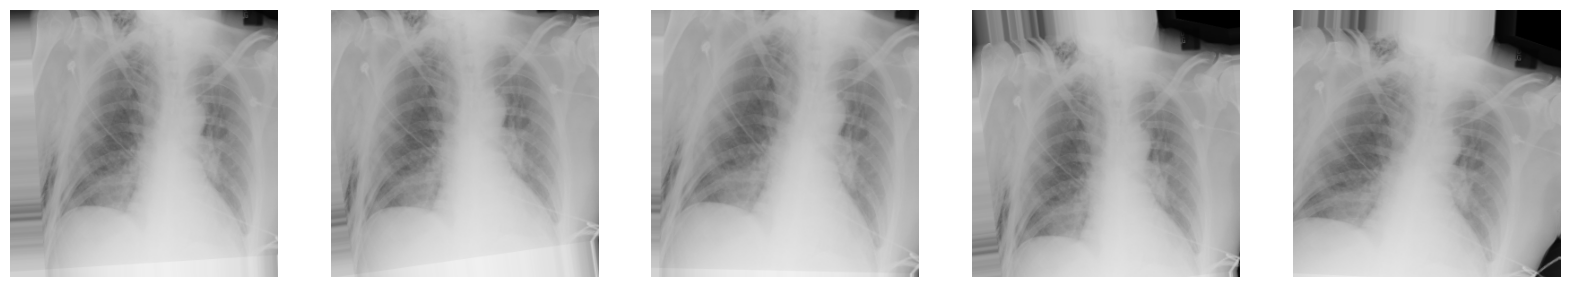

In [ ]:
# --- Step 40: Visualize Augmented Images ---
# Function to generate and visualize augmented images with different augmentation configurations.

import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# --- Subsection: Function to Visualize Augmented Images ---
def visualize_augmented_images(image_path, datagen, num_images=5):
    """
    Generates and visualizes augmented images using the data generator.

    Parameters:
        image_path (str): Path to the image to be augmented.
        datagen (ImageDataGenerator): Data generator with image augmentation transformations.
        num_images (int): Number of augmented images to display.
    """
    # Load the image and convert it to an array
    img = load_img(image_path, color_mode='rgb', target_size=(299, 299))
    img_array = img_to_array(img)
    img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for the generator

    # Generate and visualize augmented images
    fig, ax = plt.subplots(1, num_images, figsize=(20, 20))
    for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
        ax[i].imshow(batch[0].astype('uint8'))  # Display the augmented image
        ax[i].axis('off')  # Hide axes
        if i >= num_images - 1:
            break  # Display only the specified number of images
    plt.show()

# --- Subsection: Visualize Augmented Images for Minority and Majority Classes ---
# Choose an image from a minority class for visualization
sample_image_path = os.path.join('/content/images_all', '00000040_001.png')  # Replace with the image name

# Visualize augmented images for the minority class
print("Augmented images for the minority class:")
visualize_augmented_images(sample_image_path, minority_datagen)

# Visualize augmented images for the majority class
print("Augmented images for the majority class:")
visualize_augmented_images(sample_image_path, majority_datagen)

# Function to Visualize Augmented Images

Update the Training Pipeline

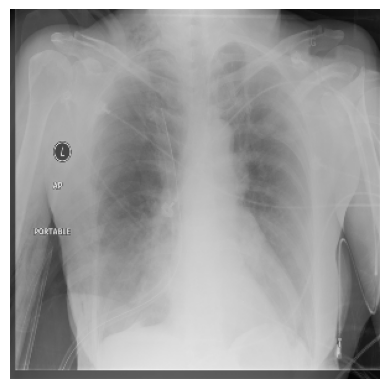

MixUp Label: [0.4009 0.5991 0.5991 0.4009 0.     0.5991 0.4009 0.     0.    ]


In [ ]:
# --- Step 41: Visualize MixUp Effect Between Two Images ---
# Function to visually check the effect of MixUp between two images and their labels.

def visualize_mixup(image_path1, image_path2, label1, label2, alpha=0.4):
    """
    Visualizes the effect of MixUp between two images and their labels.

    Parameters:
        image_path1 (str): Path to the first image.
        image_path2 (str): Path to the second image.
        label1 (array): Label for the first image.
        label2 (array): Label for the second image.
        alpha (float): Parameter to control the mixing intensity (Beta distribution).
    """
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    import matplotlib.pyplot as plt

    # Load the two images
    img1 = load_img(image_path1, color_mode='rgb', target_size=(299, 299))
    img2 = load_img(image_path2, color_mode='rgb', target_size=(299, 299))

    # Convert the images to arrays
    img1_array = img_to_array(img1)
    img2_array = img_to_array(img2)

    # Apply MixUp
    img_mixup, label_mixup = mixup(img1_array, img2_array, label1, label2, alpha=alpha)

    # Display the resulting MixUp image
    plt.imshow(img_mixup.astype('uint8'))
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

    # Print the resulting MixUp label (rounded for better readability)
    print("MixUp Label:", label_mixup.round(4))



# Image paths and labels for visualization
image_path1 = '/content/images_all/00000040_001.png'  # Replace with the path of the first image
image_path2 = '/content/images_all/00000041_001.png'  # Replace with the path of the second image
label1 = np.array([1, 0, 0, 1, 0, 0, 1, 0, 0])  # Example label for the first image
label2 = np.array([0, 1, 1, 0, 0, 1, 0, 0, 0])  # Example label for the second image

# Visualize the effect of MixUp
visualize_mixup(image_path1, image_path2, label1, label2)


Preprocess the Validation Images

In [ ]:
# --- Step 42: Load and Pre-process Validation Images --- NORMALIZATION
# This step is responsible for loading and pre-processing the validation images,
# ensuring they are in the correct format for the model.

from tensorflow.keras.applications.inception_v3 import preprocess_input

val_images = []  # Initialize an empty list to store the processed images

# Loop over each image in the validation dataset
for img_name in val_image_paths:
    # Construct the full path to the image
    img_path = os.path.join(consolidated_dir, img_name)

    # Load the image, convert it to RGB format, and resize it to the desired model input size.
    img = tf.keras.preprocessing.image.load_img(img_path, color_mode='rgb', target_size=(299, 299))

    # Convert the image to a numpy array
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    # Apply the Inception-specific preprocessing to normalize the pixel values to the range [-1, 1]
    img_array = preprocess_input(img_array)

    # Append the processed image to the list
    val_images.append(img_array)

# Convert the list of images into a numpy array
val_images_rgb = np.array(val_images)

# Verificar as dimensões do array
print(f"Dimensions of the processed images in the validation set: {val_images_rgb.shape}")


Dimensões das imagens processadas do conjunto de validação: (2903, 299, 299, 3)


In [ ]:
# --- Step 44: Comprehensive Class Imbalance Handling with Focal Loss ---
# **Purpose**: This cell provides a comprehensive framework to handle class imbalance using various techniques:
#
# ### 1. **Class Frequency Analysis**
# - Calculates the frequency of each class in the training dataset.
# - Identifies class imbalance by computing the proportion of positive samples per class.
#
# ### 2. **Weight Calculation**
# - **Alpha Weights**:
#   - Inverse proportional weights based on class frequencies.
#   - Normalized to sum up to 1, ensuring balanced importance across classes.
# - **Class Weights**:
#   - Inverse proportional weights, normalized so their mean equals 1.
#   - Useful for direct integration with the loss function to adjust for imbalance.
#
# ### 3. **Focal Loss Implementation**
# - Implements two variations of Focal Loss:
#   1. **With Alpha Weights**:
#      - Incorporates `alpha` weights to scale contributions of each class in the loss function.
#   2. **With Class Weights**:
#      - Uses precomputed class weights for adjusting loss contributions.
# - Both methods include `gamma` to focus more on hard-to-classify samples and reduce the influence of easy-to-classify samples.
#
# ### 4. **Example Usage**
# - Demonstrates the calculation of `alpha` weights and `class_weights`.
# - Prepares the Focal Loss functions for model training based on the dataset’s characteristics.
#
# This cell is a modular and reusable implementation for datasets with varying levels of class imbalance.

import numpy as np
import tensorflow.keras.backend as K
import tensorflow as tf

# --- Utility: Calculate Class Frequencies ---
def calculate_frequencies(y_train):
    """
    Calculates class frequencies and returns positive counts, total counts, and frequencies.

    Parameters:
        y_train (array): Binary labels (e.g., one-hot encoded).

    Returns:
        positive_counts (array): Positive sample counts per class.
        total_counts (int): Total number of samples.
        frequencies (array): Frequency of each class.
    """
    positive_counts = np.sum(y_train, axis=0)
    total_counts = y_train.shape[0]
    frequencies = positive_counts / total_counts
    return positive_counts, total_counts, frequencies

# --- Utility: Calculate Alpha Weights ---
def calculate_alpha_weights(frequencies):
    """
    Calculates alpha weights inversely proportional to class frequencies and normalizes them.

    Parameters:
        frequencies (array): Class frequencies.

    Returns:
        alpha (array): Normalized alpha weights.
    """
    alpha = 1 / (frequencies + 1e-6)  # Avoid division by zero
    alpha = alpha / np.sum(alpha)  # Normalize
    return alpha

# --- Utility: Calculate Class Weights ---
def calculate_class_weights(frequencies):
    """
    Calculates class weights inversely proportional to class frequencies and normalizes them.

    Parameters:
        frequencies (array): Class frequencies.

    Returns:
        class_weights (array): Normalized class weights with mean = 1.
    """
    class_weights = 1 / (frequencies + 1e-6)  # Avoid division by zero
    class_weights = class_weights / np.mean(class_weights)  # Normalize to mean 1
    return class_weights

# --- Focal Loss: With Alpha Weights ---
def focal_loss_with_alpha(gamma=2., alpha=None):
    """
    Focal loss function using alpha weights to address class imbalance.

    Parameters:
        gamma (float): Focal loss gamma parameter.
        alpha (array): Alpha weights for balancing class contributions.

    Returns:
        focal_loss_fixed (function): Focal loss function.
    """
    def focal_loss_fixed(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        bce = K.binary_crossentropy(y_true, y_pred)
        pt = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        focal_factor = K.pow(1. - pt, gamma)
        if alpha is not None:
            alpha_tensor = K.constant(alpha, dtype=K.floatx())
            alpha_factor = y_true * alpha_tensor + (1 - y_true) * (1 - alpha_tensor)
            fl = alpha_factor * focal_factor * bce
        else:
            fl = focal_factor * bce
        return K.mean(fl, axis=-1)
    return focal_loss_fixed

# --- Focal Loss: With Class Weights ---
def focal_loss_with_class_weights(gamma=3., alpha=0.25, class_weights=None):
    """
    Focal loss function using class weights to address class imbalance.

    Parameters:
        gamma (float): Focal loss gamma parameter.
        alpha (float): Alpha parameter for scaling.
        class_weights (array): Class weights.

    Returns:
        focal_loss_fixed (function): Focal loss function.
    """
    def focal_loss_fixed(y_true, y_pred):
        y_pred = K.clip(y_pred, K.epsilon(), 1. - K.epsilon())
        bce = K.binary_crossentropy(y_true, y_pred)
        pt = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        focal_factor = K.pow(1. - pt, gamma)
        if class_weights is not None:
            class_weights_tensor = K.constant(class_weights, dtype=tf.float32)
            class_weights_tensor = K.reshape(class_weights_tensor, (1, -1))
            fl = alpha * focal_factor * bce * class_weights_tensor
        else:
            fl = alpha * focal_factor * bce
        return K.mean(fl, axis=-1)
    return focal_loss_fixed

# --- Example Usage ---
positive_counts, total_counts, frequencies = calculate_frequencies(y_train)
alpha = calculate_alpha_weights(frequencies)
class_weights = calculate_class_weights(frequencies)

# --- Adjust Class Weights for Multiple Classes ---
# Define a dictionary with class names as keys and adjustment factors as values
adjustment_factors = {
    'Pneumonia': 2.0,
    'Emphysema': 1.5,
    # Add more classes and factors as needed
}

# Loop over the classes and adjust their weights
for class_name, factor in adjustment_factors.items():
    # Ensure the class exists in target_pathologies
    if class_name in target_pathologies:
        # Find the index of the class
        class_index = target_pathologies.index(class_name)
        # Adjust the class weight
        class_weights[class_index] *= factor
    else:
        print(f"Class '{class_name}' not found in target_pathologies.")

print("Alpha weights:\n", alpha)
print("Class weights after adjustment:\n", class_weights)

print("Alpha weights:\n", alpha)
print("Class weights:\n", class_weights)

# Use the respective focal loss function
focal_loss_alpha = focal_loss_with_alpha(gamma=2., alpha=alpha)
focal_loss_weights = focal_loss_with_class_weights(gamma=3., alpha=0.25, class_weights=class_weights)

Alpha weights:
 Atelectasis     0.040377
Cardiomegaly    0.171022
Emphysema       0.188926
Effusion        0.036081
Mass            0.080686
Nodule          0.073881
Pneumonia       0.318150
Pneumothorax    0.090877
dtype: float64
Class weights after adjustment:
 Atelectasis     0.323020
Cardiomegaly    1.368177
Emphysema       2.267117
Effusion        0.288646
Mass            0.645485
Nodule          0.591045
Pneumonia       5.090405
Pneumothorax    0.727013
dtype: float64
Alpha weights:
 Atelectasis     0.040377
Cardiomegaly    0.171022
Emphysema       0.188926
Effusion        0.036081
Mass            0.080686
Nodule          0.073881
Pneumonia       0.318150
Pneumothorax    0.090877
dtype: float64
Class weights:
 Atelectasis     0.323020
Cardiomegaly    1.368177
Emphysema       2.267117
Effusion        0.288646
Mass            0.645485
Nodule          0.591045
Pneumonia       5.090405
Pneumothorax    0.727013
dtype: float64


In [ ]:
# --- Step 46: Configure Focal Loss with Adjusted Parameters ---
# Configure Focal Loss with parameters tailored to handle class imbalance effectively.
# Choose the desired focal loss function (with or without class weights).

# Option 1: Focal Loss with Class Weights
focal_loss_fn = focal_loss_with_class_weights(
    gamma=3,  # Focusing parameter to adjust the importance of hard-to-classify examples
    alpha=0.5,  # Balancing factor to mitigate class imbalance
    class_weights=class_weights  # Class-specific weights inversely proportional to class frequencies
)

# Option 2: Standard Focal Loss (uncomment to use without class weights)
# focal_loss_fn = focal_loss_with_alpha(gamma=3, alpha=0.35)

# --- Step: Define Hybrid Loss Function ---
def hybrid_loss(y_true, y_pred):
    """
    Combines Focal Loss, Binary Crossentropy, and Hinge Loss into a hybrid loss function.

    Parameters:
        y_true (tensor): True labels.
        y_pred (tensor): Predicted probabilities.

    Returns:
        loss (tensor): Combined loss value.
    """
    # Focal Loss with the configured parameters
    focal = focal_loss_fn(y_true, y_pred)

    # Binary Crossentropy with label smoothing to add robustness
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred, label_smoothing=0.05)

    # Hinge Loss (optional, included to enforce margin-based classification)
    #hinge = tf.keras.losses.hinge(y_true, y_pred)

    # Combine the losses with custom weights
    #return 0.6 * focal + 0.3 * bce + 0.1 * hinge
    return 0.7 * focal + 0.3 * bce

EfficientNetB0: 224x224
EfficientNetB1: 240x240
EfficientNetB2: 260x260
EfficientNetB3: 300x300
EfficientNetB4: 380x380
EfficientNetB5: 456x456
EfficientNetB6: 528x528
EfficientNetB7: 600x600

In [ ]:
# --- Step 47: Model Definition and Compilation ---
# Import necessary libraries for defining and training the model.

import tensorflow as tf
from tensorflow.keras.applications import DenseNet121, ResNet50, InceptionV3, EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import roc_curve  # Adding this line to calculate ROC curve
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.layers import Conv2D


# Configuring MirroredStrategy for multi-GPU usage (if applicable)
strategy = tf.distribute.MirroredStrategy()

# Inside the strategy scope, define and compile the model
with strategy.scope():
    # Load the base model. Choose a pre-trained model: InceptionV3 is used here.
    #base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    #base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))  # Default choice
    #base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))  # Alternative choice


    # Unfreeze the last 'n' layers of the base model
    n = 200  # You can adjust this number as needed
    for layer in base_model.layers[:-n]:
        layer.trainable = False
    for layer in base_model.layers[-n:]:
        layer.trainable = True
        # Apply L2 regularization to trainable Conv2D layers in the base model
        if isinstance(layer, tf.keras.layers.Conv2D):
            layer.kernel_regularizer = tf.keras.regularizers.l2(1e-3)



    # Adding custom layers on top of the base model
    x = base_model.output

    # Add new Conv2D layers
    #x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4))(x)
    #x = BatchNormalization()(x)
    #x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4))(x)
    #x = BatchNormalization()(x)

    x = GlobalAveragePooling2D()(x)  # Pooling layer to reduce parameters
    x = Dropout(0.2)(x)  # Novo Dropout inicial

    # Add Dense layers with regularization and Dropout
    x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(1e-3))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    # Final output layer
    output = Dense(len(target_pathologies), activation='sigmoid')(x)

    # Compile the model
    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model with the Focal Loss
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, weight_decay=1e-5)  # Adam optimizer with learning rate and weight decay
    model.compile(optimizer=optimizer,
                  #loss=focal_loss_with_class_weights(gamma=2., class_weights=class_weights),  # Using class_weights
                  #loss=focal_loss_with_class_weights(gamma=2., alpha=0.35, class_weights=class_weights),  # Using Focal Loss with alpha and class weights
                  #loss=focal_loss(gamma=2., alpha=alpha),  # Alternative loss using alpha vector
                  #loss=focal_loss(gamma=2., class_weights=class_weights),  # Usando class_weights
                  loss=hybrid_loss,  # New hybrid loss
                  metrics=[tf.keras.metrics.AUC(multi_label=True), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# --- Step 48: Create and Configure the Custom MetricsCallback ---
# Define the custom MetricsCallback to track performance metrics at the end of each epoch.

class MetricsCallback(tf.keras.callbacks.Callback):
    def __init__(self, val_data, val_labels):
        super().__init__()
        self.validation_data = val_data
        self.validation_labels = val_labels

    def on_epoch_end(self, epoch, logs=None):
        # Predict on validation data
        val_pred = self.model.predict(self.validation_data)

        # Calculate optimal thresholds for each class
        optimal_thresholds = []
        for idx, label in enumerate(target_pathologies):
            fpr, tpr, thresholds = roc_curve(self.validation_labels[:, idx], val_pred[:, idx])
            J = tpr - fpr
            idx_optimal = np.argmax(J)
            optimal_threshold = thresholds[idx_optimal]
            optimal_thresholds.append(optimal_threshold)

        # Apply optimal thresholds to the predictions
        val_pred_binary = np.zeros_like(val_pred)
        for idx in range(len(target_pathologies)):
            val_pred_binary[:, idx] = (val_pred[:, idx] >= optimal_thresholds[idx]).astype(int)

        # Calculate classification metrics for each class
        report = classification_report(
            self.validation_labels,
            val_pred_binary,
            target_names=target_pathologies,
            zero_division=0,
            output_dict=True
        )

        # Calculate AUC-ROC for each class
        auc_scores = {}
        for idx, label in enumerate(target_pathologies):
            try:
                auc = roc_auc_score(self.validation_labels[:, idx], val_pred[:, idx])
            except ValueError:
                auc = float('nan')  # If only one class is present, set AUC to NaN
            auc_scores[label] = auc

        print(f"\n--- Metrics at Epoch {epoch + 1} ---")
        for idx, label in enumerate(target_pathologies):
            precision = report[label]['precision']
            recall = report[label]['recall']
            f1_score = report[label]['f1-score']
            support = report[label]['support']
            auc = auc_scores[label]
            threshold = optimal_thresholds[idx]
            print(f"{label}: Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1_score:.4f}, AUC={auc:.4f}, Threshold={threshold:.4f}, Support={support}")

In [ ]:
# --- Step 49: Add MetricsCallback to the Training Callbacks ---
# Define the custom MetricsCallback to track performance metrics at the end of each epoch.
metrics_callback = MetricsCallback(val_images_rgb, val_labels)

# Set up training callbacks
callbacks = [
    EarlyStopping(monitor='val_auc', mode='max', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=0),
    metrics_callback  # Add the custom MetricsCallback to monitor metrics
]

# Define steps_per_epoch as the total number of training samples divided by batch size
steps_per_epoch = len(train_image_paths) // batch_size

In [ ]:
# --- Step 50: Train the Model with the Configured Callbacks ---
# The model is trained using the generator and validation data, along with the defined callbacks.

history = model.fit(
    train_generator,  # The custom data generator
    steps_per_epoch=steps_per_epoch,  # Number of steps per epoch
    epochs=60,  # You can adjust the number of epochs as needed
    validation_data=(val_images_rgb, val_labels),  # Validation data
    callbacks=callbacks  # List of callbacks to be used during training
)

Epoch 1/60
 79/644 ━━━━━━━━━━━━━━━━━━━━ 3:11:44 20s/step - auc: 0.5314 - loss: 0.8513 - precision: 0.1658 - recall: 0.5136

In [ ]:
# --- Step 51: Print Training History Keys ---
# After training the model, display the keys from the training history.
# This shows all recorded metrics during training and validation.

# Print the keys of the training history dictionary
print(history.history.keys())

dict_keys(['auc', 'loss', 'precision', 'recall', 'val_auc', 'val_loss', 'val_precision', 'val_recall', 'learning_rate'])


dict_keys(['auc', 'loss', 'precision', 'recall', 'val_auc', 'val_loss', 'val_precision', 'val_recall', 'learning_rate'])


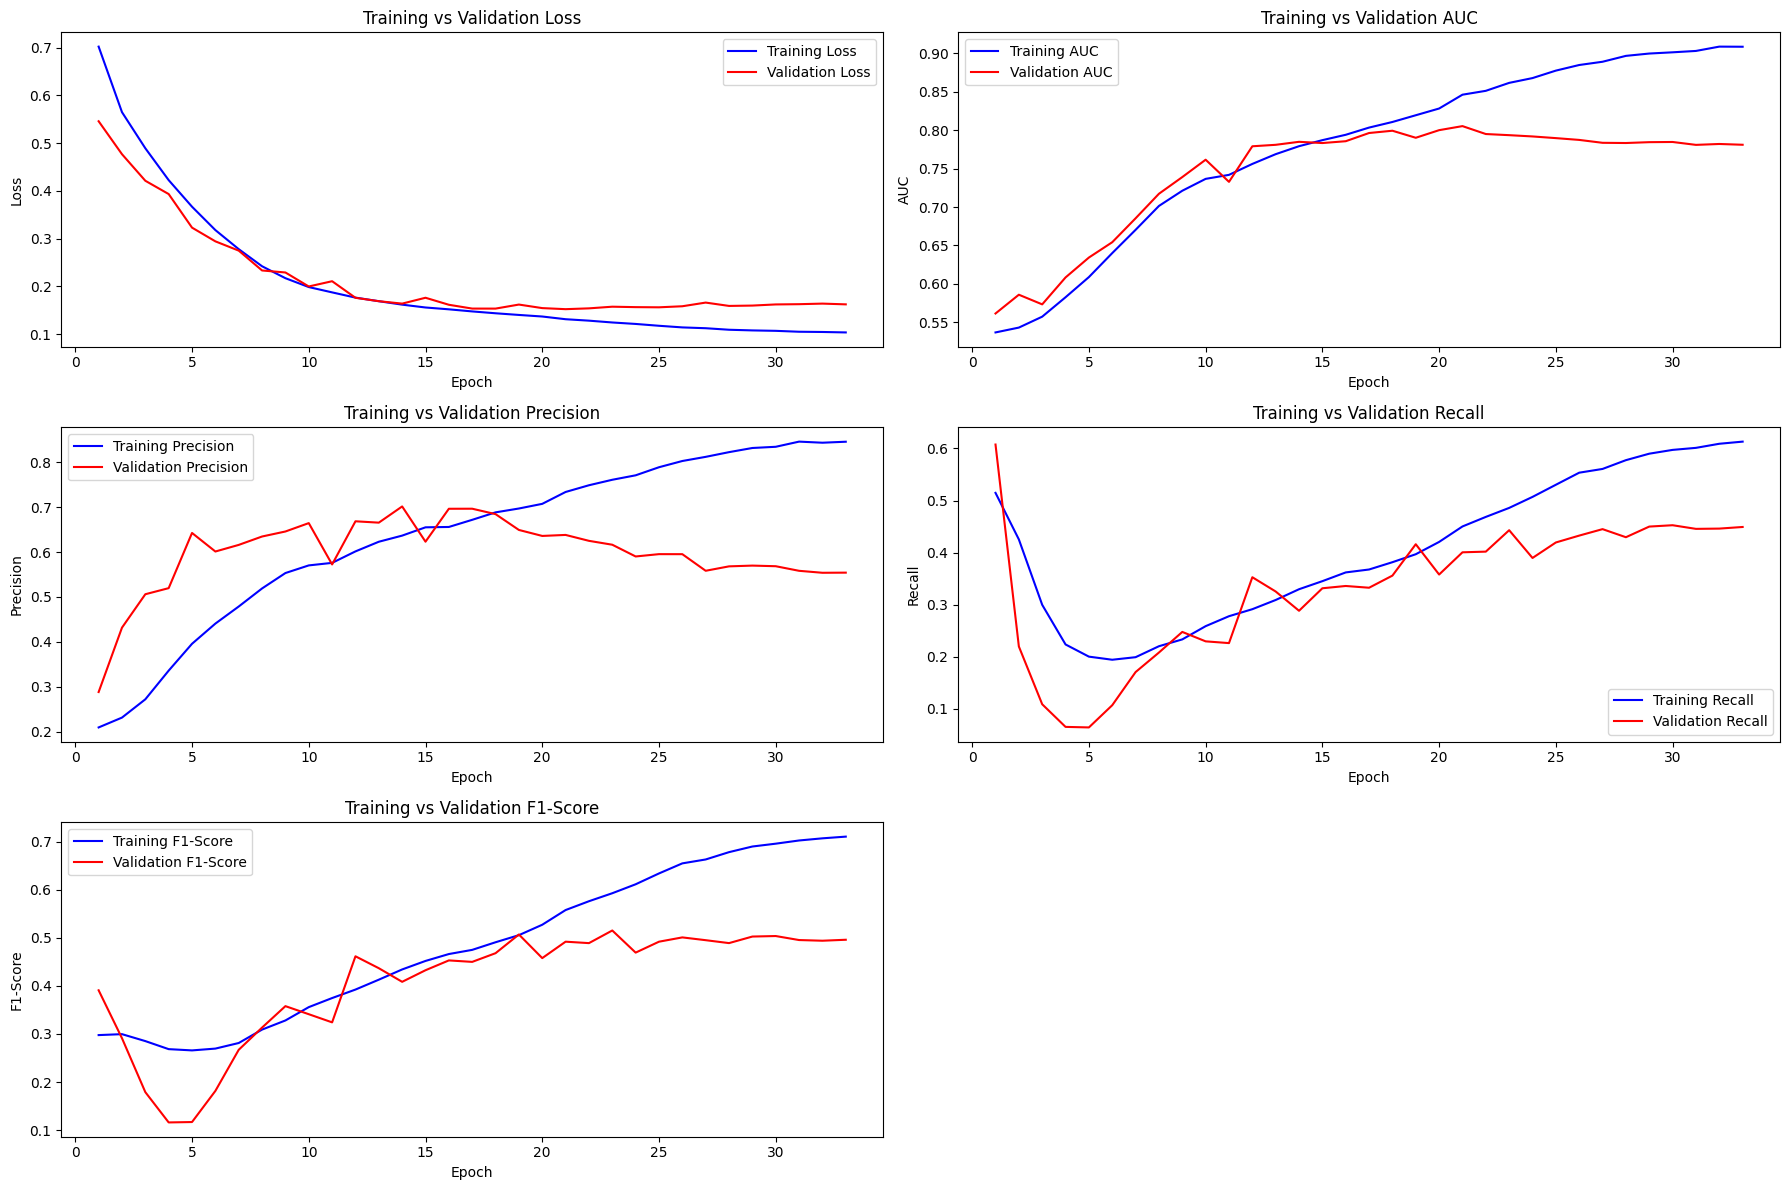

In [ ]:
import matplotlib.pyplot as plt

# --- Step 52: Function to Compute and Plot Training and Validation Metrics ---
# This function calculates F1-Score based on precision and recall metrics in the training history
# and plots loss, AUC, precision, recall, and F1-Score for both training and validation.

def plot_history_with_f1(history):
    """
    Calculate and plot training and validation metrics (including F1-Score).

    Parameters:
    - history: Training history object returned by `model.fit()`.
    """

    # Print available keys to ensure metric names are correct
    print(history.history.keys())

    # Compute F1-Score for training and validation based on precision and recall
    train_f1_scores = []
    val_f1_scores = []

    for epoch in range(len(history.history['precision'])):
        train_precision = history.history['precision'][epoch]
        train_recall = history.history['recall'][epoch]
        val_precision = history.history['val_precision'][epoch]
        val_recall = history.history['val_recall'][epoch]

        # Avoid division by zero
        train_f1 = 2 * (train_precision * train_recall) / (train_precision + train_recall) if (train_precision + train_recall) > 0 else 0.0
        val_f1 = 2 * (val_precision * val_recall) / (val_precision + val_recall) if (val_precision + val_recall) > 0 else 0.0

        train_f1_scores.append(train_f1)
        val_f1_scores.append(val_f1)

    # Add F1-Scores to the training history for plotting
    history.history['f1_score'] = train_f1_scores
    history.history['val_f1_score'] = val_f1_scores

    # Plot metrics
    epochs = range(1, len(history.history['loss']) + 1)
    plt.figure(figsize=(18, 12))

    # Plot Loss
    plt.subplot(3, 2, 1)
    plt.plot(epochs, history.history['loss'], 'b', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'r', label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot AUC
    plt.subplot(3, 2, 2)
    plt.plot(epochs, history.history['auc'], 'b', label='Training AUC')
    plt.plot(epochs, history.history['val_auc'], 'r', label='Validation AUC')
    plt.title('Training vs Validation AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()

    # Plot Precision
    plt.subplot(3, 2, 3)
    plt.plot(epochs, history.history['precision'], 'b', label='Training Precision')
    plt.plot(epochs, history.history['val_precision'], 'r', label='Validation Precision')
    plt.title('Training vs Validation Precision')
    plt.xlabel('Epoch')
    plt.ylabel('Precision')
    plt.legend()

    # Plot Recall
    plt.subplot(3, 2, 4)
    plt.plot(epochs, history.history['recall'], 'b', label='Training Recall')
    plt.plot(epochs, history.history['val_recall'], 'r', label='Validation Recall')
    plt.title('Training vs Validation Recall')
    plt.xlabel('Epoch')
    plt.ylabel('Recall')
    plt.legend()

    # Plot F1-Score
    plt.subplot(3, 2, 5)
    plt.plot(epochs, train_f1_scores, 'b', label='Training F1-Score')
    plt.plot(epochs, val_f1_scores, 'r', label='Validation F1-Score')
    plt.title('Training vs Validation F1-Score')
    plt.xlabel('Epoch')
    plt.ylabel('F1-Score')
    plt.legend()

    plt.tight_layout()
    plt.show()

# --- Step 50: Call the function to plot history with F1-Score ---
# Use the trained model's history object to compute and plot metrics
plot_history_with_f1(history)

In [ ]:
### Step 53: Evaluate the Model on the Test Set

import tensorflow as tf
import numpy as np
import os
from sklearn.metrics import f1_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Directory where the images are stored
consolidated_dir = '/content/images_all'  # Replace with the correct path

# --- Subsection: Generic Data Generator ---
# Generic function to load images in batches (can be used for train, validation, and test sets)
def data_generator(image_paths, labels, batch_size):
    """
    Generate batches of images and labels for model evaluation.

    Parameters:
    - image_paths (list): List of paths to image files.
    - labels (array): Corresponding labels for the images.
    - batch_size (int): Number of samples per batch.

    Yields:
    - batch_images (numpy array): Batch of preprocessed images.
    - batch_labels (numpy array): Batch of labels.
    """
    num_samples = len(image_paths)
    indices = np.arange(num_samples)

    for start in range(0, num_samples, batch_size):
        end = min(start + batch_size, num_samples)
        batch_indices = indices[start:end]
        batch_images = []
        batch_labels = []

        for idx in batch_indices:
            img_path = os.path.join(consolidated_dir, image_paths[idx])

            if not os.path.exists(img_path):
                continue  # Skip images that do not exist

            img = tf.keras.preprocessing.image.load_img(
                img_path, color_mode='rgb', target_size=(299, 299)
            )
            img_array = tf.keras.preprocessing.image.img_to_array(img)

            # Normalizar para o intervalo [-1, 1]
            img_array = (img_array / 255.0) * 2 - 1

            batch_images.append(img_array)
            batch_labels.append(labels[idx])

        if batch_images:
            yield np.array(batch_images), np.array(batch_labels)

# --- Subsection: Configure Batch Size for the Data Generator ---
batch_size = 128

# Recreate the data generator for the test set
test_generator = data_generator(test_image_paths, test_labels, batch_size=batch_size)

# --- Subsection: Evaluate the Model on the Test Set ---
# Evaluate the model on the test set without printing details for each batch
test_loss, test_auc, test_precision, test_recall = model.evaluate(
    test_generator, verbose=0  # Set verbose to 0 to suppress output
)

# --- Subsection: Calculate F1-Score ---
def calculate_f1_score(precision, recall):
    """
    Calculate F1-Score given precision and recall.

    Parameters:
    - precision (float): Precision value.
    - recall (float): Recall value.

    Returns:
    - f1_score (float): Computed F1-Score.
    """
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

# Compute the F1-Score for the test set
test_f1_score = calculate_f1_score(test_precision, test_recall)

# --- Subsection: Display Test Evaluation Results ---
print("\nTest Set Evaluation Results:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test AUC-ROC: {test_auc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1-Score: {test_f1_score:.4f}")


Test Set Evaluation Results:
Test Loss: 0.1523
Test AUC-ROC: 0.7905
Test Precision: 0.6278
Test Recall: 0.3772
Test F1-Score: 0.4712


In [ ]:
# --- Step 54 ---
# Obtain the predicted probabilities from the model
y_pred_proba = model.predict(val_images_rgb, batch_size=batch_size)

# Ensure the dimensions match
print(f"Shape of y_pred_proba: {y_pred_proba.shape}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 690ms/step
Shape of y_pred_proba: (2903, 8)


In [ ]:
# --- Step 55: Calculate Optimal Thresholds for Each Class ---
# This step calculates dynamic thresholds for each class based on the Precision-Recall curve,
# ensuring optimal F1-Score for multi-label classification.

import numpy as np
from sklearn.metrics import precision_recall_curve

# Ensure `y_val` and `y_pred_proba` are defined as NumPy arrays
y_val = np.array(y_val)  # True labels for the validation/test set
y_pred_proba = np.array(y_pred_proba)  # Predicted probabilities from the model

# Initialize a list to store the optimal thresholds for each class
optimal_thresholds = []

# Iterate over each class to compute its optimal threshold
for i in range(len(target_pathologies)):  # Replace `target_pathologies` with the number of classes if needed
    y_true_class = y_val[:, i]  # Extract true labels for class `i`
    y_pred_class = y_pred_proba[:, i]  # Extract predicted probabilities for class `i`

    # Calculate the Precision-Recall curve
    precision, recall, thresholds = precision_recall_curve(y_true_class, y_pred_class)

    # Compute F1-Score for each threshold
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)  # Avoid division by zero

    # Find the threshold that maximizes the F1-Score
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]

    # Append the optimal threshold for the current class
    optimal_thresholds.append(optimal_threshold)

# Display the calculated optimal thresholds for each class
print(f"Optimal thresholds for each class: {optimal_thresholds}")

# --- Step 55.1: Apply Dynamic Thresholds to Generate Binary Predictions ---
# Convert predicted probabilities into binary predictions using the calculated dynamic thresholds.

# Initialize an array to store the binary predictions
y_pred_dynamic = np.zeros_like(y_pred_proba, dtype=int)

# Apply the optimal threshold for each class
for i, threshold in enumerate(optimal_thresholds):
    y_pred_dynamic[:, i] = (y_pred_proba[:, i] >= threshold).astype(int)

# Display the shape of the resulting binary predictions
print(f"Shape of y_pred_dynamic: {y_pred_dynamic.shape}")

Optimal thresholds for each class: [0.33490652, 0.19689137, 0.35437012, 0.3350819, 0.41821957, 0.3526325, 0.24252035, 0.4281189]
Shape of y_pred_dynamic: (2903, 8)


In [ ]:
# --- Step 56 ---
from sklearn.metrics import classification_report

print("Classification Report (Dynamic Thresholds):")
print(classification_report(y_val, y_pred_dynamic, target_names=target_pathologies))

Classification Report (Dynamic Thresholds):
              precision    recall  f1-score   support

 Atelectasis       0.50      0.76      0.60       949
Cardiomegaly       0.59      0.41      0.48       220
   Emphysema       0.58      0.50      0.54       223
    Effusion       0.64      0.75      0.69      1112
        Mass       0.49      0.50      0.49       406
      Nodule       0.36      0.57      0.44       438
   Pneumonia       0.20      0.27      0.23       115
Pneumothorax       0.44      0.69      0.54       402

   micro avg       0.50      0.65      0.57      3865
   macro avg       0.47      0.56      0.50      3865
weighted avg       0.52      0.65      0.57      3865
 samples avg       0.53      0.67      0.56      3865



In [ ]:
# --- Step 57: Binarize Predictions Using Dynamic Thresholds ---
# Convert predicted probabilities into binary labels using class-specific dynamic thresholds.

import numpy as np

# Ensure that the optimal thresholds are already computed
# `optimal_thresholds` should contain the thresholds for each class
print(f"Optimal thresholds being applied: {optimal_thresholds}")

# Binarize the predictions using the dynamic thresholds
y_pred_dynamic = np.zeros_like(y_pred_proba, dtype=int)
for i, threshold in enumerate(optimal_thresholds):
    y_pred_dynamic[:, i] = (y_pred_proba[:, i] >= threshold).astype(int)

# Display the shape of the binary predictions
print(f"Shape of y_pred_dynamic: {y_pred_dynamic.shape}")

# Optional: You can display a few examples of the binary predictions
print(f"Example of dynamic binary predictions:\n{y_pred_dynamic[:5]}")

Optimal thresholds being applied: [0.33490652, 0.19689137, 0.35437012, 0.3350819, 0.41821957, 0.3526325, 0.24252035, 0.4281189]
Shape of y_pred_dynamic: (2903, 8)
Example of dynamic binary predictions:
[[0 0 0 1 0 0 1 0]
 [0 0 0 0 1 1 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0]]


In [ ]:
# Ensure y_true is correctly defined as the true labels
y_true = np.array(y_val)  # If y_val represents the true labels


In [ ]:
print(f"Shape of y_true: {y_true.shape}")
print(f"Shape of y_pred_proba: {y_pred_proba.shape}")


Shape of y_true: (2903, 8)
Shape of y_pred_proba: (2903, 8)


In [ ]:
# --- Step 59: Evaluate Model Performance by Class ---
# Generate a classification report, calculate AUC-ROC, and compute F1-Score for each class.

from sklearn.metrics import classification_report, roc_auc_score, f1_score

# Define the class names (replace with actual class names)
classes = ['Atelectasis', 'Cardiomegaly', 'Emphysema', 'Effusion',
           'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']

# Use dynamic predictions for evaluation
# Ensure y_pred_dynamic is being used
report = classification_report(y_true, y_pred_dynamic, target_names=classes, zero_division=0)
print("Classification Report (Dynamic Thresholds):\n")
print(report)

# Calculate AUC-ROC for each class using predicted probabilities
auc_scores = {}
for i, class_name in enumerate(classes):
    try:
        auc = roc_auc_score(y_true[:, i], y_pred_proba[:, i])
    except ValueError:
        auc = float('nan')  # AUC undefined if a class has only one label present
    auc_scores[class_name] = auc

print("\nAUC-ROC by Class:")
for class_name, auc in auc_scores.items():
    print(f"{class_name}: {auc:.4f}")

# Calculate F1-Score for each class using dynamic predictions
f1_scores = f1_score(y_true, y_pred_dynamic, average=None)
print("\nF1-Score by Class (Dynamic Thresholds):")
for i, class_name in enumerate(classes):
    print(f"{class_name}: {f1_scores[i]:.4f}")

Classification Report (Dynamic Thresholds):

              precision    recall  f1-score   support

 Atelectasis       0.50      0.76      0.60       949
Cardiomegaly       0.59      0.41      0.48       220
   Emphysema       0.58      0.50      0.54       223
    Effusion       0.64      0.75      0.69      1112
        Mass       0.49      0.50      0.49       406
      Nodule       0.36      0.57      0.44       438
   Pneumonia       0.20      0.27      0.23       115
Pneumothorax       0.44      0.69      0.54       402

   micro avg       0.50      0.65      0.57      3865
   macro avg       0.47      0.56      0.50      3865
weighted avg       0.52      0.65      0.57      3865
 samples avg       0.53      0.67      0.56      3865


AUC-ROC by Class:
Atelectasis: 0.7610
Cardiomegaly: 0.8322
Emphysema: 0.8731
Effusion: 0.8094
Mass: 0.7967
Nodule: 0.7776
Pneumonia: 0.7439
Pneumothorax: 0.8463

F1-Score by Class (Dynamic Thresholds):
Atelectasis: 0.5998
Cardiomegaly: 0.4826
Emphys

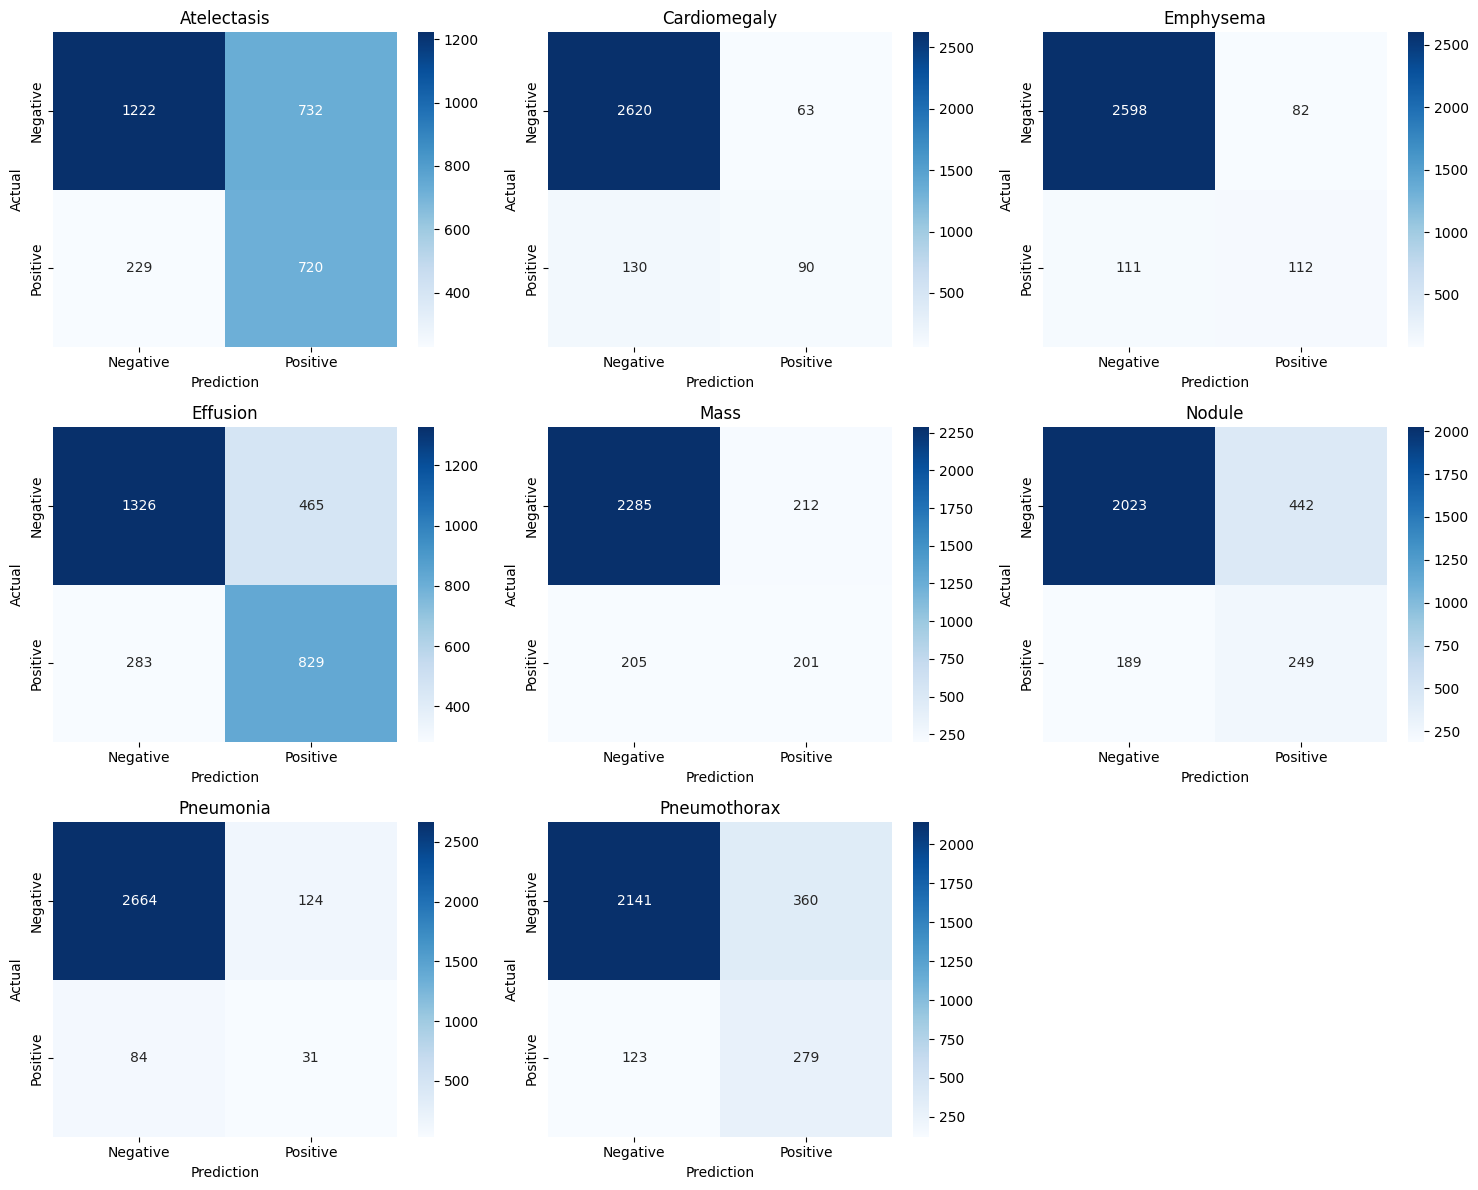

In [ ]:
# --- Step 60: Plot Confusion Matrices for Each Class ---
# This step generates and visualizes confusion matrices for all classes in a compact layout.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Function to plot confusion matrices in a row of three
def plot_confusion_matrices_row(y_true, y_pred_dynamic, classes):
    """
    Plots confusion matrices for each class, arranged in rows of three.

    Parameters:
    - y_true: True binary labels for all classes (2D array).
    - y_pred_dynamic: Predicted binary labels for all classes (2D array).
    - classes: List of class names.
    """
    n_classes = len(classes)
    n_cols = 3  # Number of matrices per row
    n_rows = int(np.ceil(n_classes / n_cols))  # Calculate required rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten()

    for i, class_name in enumerate(classes):
        cm = confusion_matrix(y_true[:, i], y_pred_dynamic[:, i])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Negative', 'Positive'],
                    yticklabels=['Negative', 'Positive'],
                    ax=axes[i])
        axes[i].set_title(f'{class_name}')
        axes[i].set_xlabel('Prediction')
        axes[i].set_ylabel('Actual')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the function with your predictions and classes
plot_confusion_matrices_row(y_true, y_pred_dynamic, classes)

In [ ]:
# --- Step 61: List All Model Layers to Verify Names ---
# This step displays all the layers in the model along with their names and output shapes.

for i, layer in enumerate(model.layers):
    print(f"{i}: {layer.name} - {layer.output.shape}")

0: input_layer - (None, 299, 299, 3)
1: conv2d - (None, 149, 149, 32)
2: batch_normalization - (None, 149, 149, 32)
3: activation - (None, 149, 149, 32)
4: conv2d_1 - (None, 147, 147, 32)
5: batch_normalization_1 - (None, 147, 147, 32)
6: activation_1 - (None, 147, 147, 32)
7: conv2d_2 - (None, 147, 147, 64)
8: batch_normalization_2 - (None, 147, 147, 64)
9: activation_2 - (None, 147, 147, 64)
10: max_pooling2d - (None, 73, 73, 64)
11: conv2d_3 - (None, 73, 73, 80)
12: batch_normalization_3 - (None, 73, 73, 80)
13: activation_3 - (None, 73, 73, 80)
14: conv2d_4 - (None, 71, 71, 192)
15: batch_normalization_4 - (None, 71, 71, 192)
16: activation_4 - (None, 71, 71, 192)
17: max_pooling2d_1 - (None, 35, 35, 192)
18: conv2d_8 - (None, 35, 35, 64)
19: batch_normalization_8 - (None, 35, 35, 64)
20: activation_8 - (None, 35, 35, 64)
21: conv2d_6 - (None, 35, 35, 48)
22: conv2d_9 - (None, 35, 35, 96)
23: batch_normalization_6 - (None, 35, 35, 48)
24: batch_normalization_9 - (None, 35, 35, 96)


In [ ]:
# --- Step 62: Grad-CAM++ Implementation with Side-by-Side Visualization ---
"""
--- Class-Specific Grad-CAM++ Visualization ---
This script applies Grad-CAM++ to visualize how a model focuses on specific regions of an image
for a user-specified class. The script allows flexibility to select any class index for visualization,
making it adaptable for multi-class classification tasks.

Key Steps:
1. Load and preprocess the selected test images.
2. Generate Grad-CAM++ heatmaps for the specified class.
3. Display the Grad-CAM++ heatmaps side by side for better comparison.

Note: Ensure that the `selected_class_index` variable corresponds to the class of interest as per the
model's class index mapping. Update the `last_conv_layer_name` variable to match your model's architecture.
"""

import tensorflow as tf
import numpy as np
import os
from matplotlib import cm
import matplotlib.pyplot as plt

# --- Function: Load and Preprocess an Image ---
def get_img_array(img_path, size):
    """
    Load and preprocess an image for Grad-CAM++.

    Parameters:
        img_path (str): Path to the image file.
        size (tuple): Target size for resizing the image.

    Returns:
        np.array: Preprocessed image array normalized to [-1, 1].
    """
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0) / 127.5 - 1.0  # Normalize to [-1, 1]
    #array = np.expand_dims(array, axis=0) / 255.0
    return array

# --- Function: Generate Grad-CAM++ Heatmap ---
def make_gradcampp_heatmap(img_array, model, last_conv_layer_name, class_index=None):
    """
    Generates a Grad-CAM++ heatmap for a given image and model.

    Parameters:
        img_array (np.array): Preprocessed image array.
        model (tf.keras.Model): Trained model.
        last_conv_layer_name (str): Name of the last convolutional layer.
        class_index (int, optional): Index of the class for visualization. If None, the model's top prediction is used.

    Returns:
        np.array: Grad-CAM++ heatmap.
    """
    grad_model = tf.keras.models.Model(
        model.input, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if class_index is None:
            class_index = tf.argmax(predictions[0])
        output = predictions[:, class_index]

    grads = tape.gradient(output, conv_outputs)

    first = tf.exp(output) * grads
    second = tf.exp(output) * grads * grads
    third = tf.exp(output) * grads * grads * grads

    alpha_num = second
    alpha_denom = 2.0 * second + tf.reduce_sum(conv_outputs * third, axis=(0, 1, 2))
    alpha_denom = tf.where(alpha_denom != 0.0, alpha_denom, tf.ones_like(alpha_denom))

    alphas = alpha_num / alpha_denom
    weights = tf.reduce_sum(alphas * tf.maximum(grads, 0.0), axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    cam = tf.reduce_sum(tf.maximum(weights, 0.0) * conv_outputs, axis=-1)

    heatmap = tf.maximum(cam, 0) / tf.math.reduce_max(cam)  # Normalize to [0, 1]
    return heatmap.numpy()

# --- Configuration for Class Index and Images ---
# Define class index for visualization
# Class indices mapping (replace with the appropriate mapping for your model)
# Example: {'Atelectasis': 0, 'Cardiomegaly': 1, 'Emphysema': 2, 'Effusion': 3, 'Mass': 4, 'Nodule': 5, 'Pneumonia': 6, 'Pneumothorax': 7}
selected_class_index = 3  # Replace with the desired class index for visualization

# Select random images from the test set
num_samples = 3
selected_indices = np.random.choice(len(test_image_paths), num_samples, replace=False)

# Last convolutional layer name (adjust according to your model)
last_conv_layer_name = 'mixed10'

# --- Apply Grad-CAM++ for Selected Images ---
# Initialize plot for side-by-side visualization
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for i, idx in enumerate(selected_indices):
    img_path = os.path.join(consolidated_dir, test_image_paths[idx])
    img_array = get_img_array(img_path, size=(299, 299))

    # Generate Grad-CAM++ heatmap for the selected class
    heatmap = make_gradcampp_heatmap(img_array, model, last_conv_layer_name, class_index=selected_class_index)

    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Apply heatmap
    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose heatmap on the image
    superimposed_img = jet_heatmap * 0.4 + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Display the Grad-CAM++ result
    axes[i].imshow(superimposed_img)
    axes[i].axis('off')
    axes[i].set_title(f'Class Index: {selected_class_index}\nImage {idx}')

plt.tight_layout()
plt.show()


In [ ]:
# --- Step 63: Identify and Display Labels for a Specific Test Image ---
# Assuming '1985' is the index of the target image in the test dataset.

# Define the image index
image_index = 4802

# Retrieve the corresponding label
associated_label = test_labels[image_index]  # Adjust indexing if using dictionaries or dataframes

# Map the class names to their respective indices
class_indices = {class_name: idx for idx, class_name in enumerate(target_pathologies)}

# Display the mapping of class names to indices
print("Class indices mapping:", class_indices)

# Display the label
print("Associated Pathologies:", associated_label)

Class indices mapping: {'Atelectasis': 0, 'Cardiomegaly': 1, 'Emphysema': 2, 'Effusion': 3, 'Mass': 4, 'Nodule': 5, 'Pneumonia': 6, 'Pneumothorax': 7}
Associated Pathologies: [0 0 0 1 0 0 0 0]


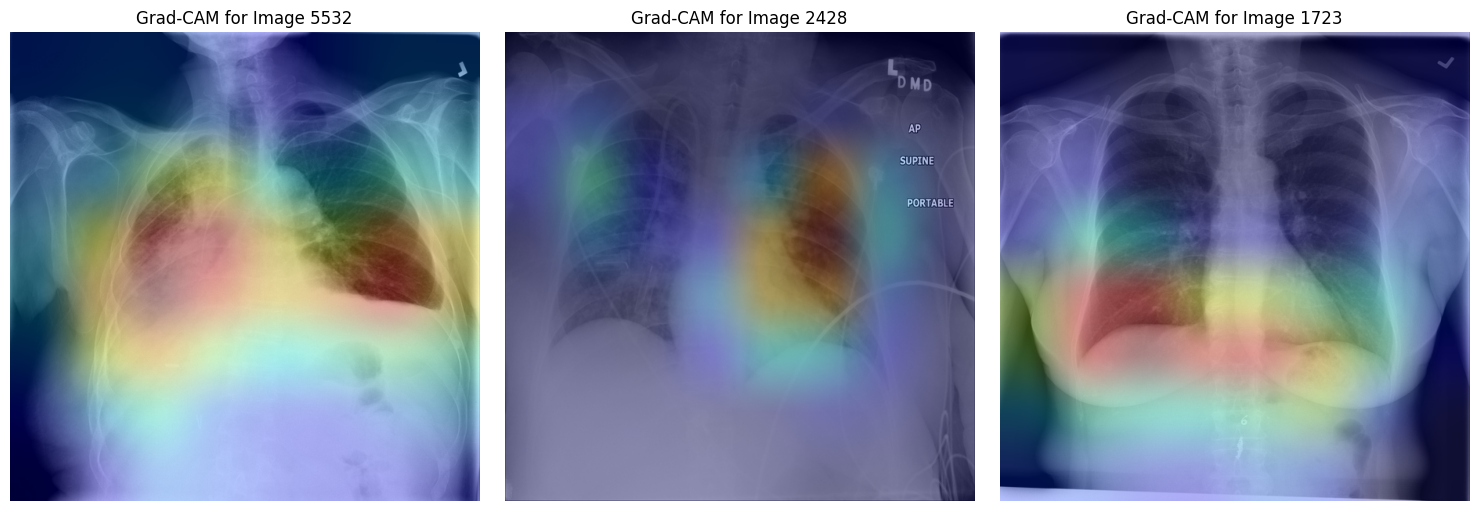

In [ ]:
# --- Step 64: Random Grad-CAM Implementation (Side-by-Side Visualization) ---
# This step applies Grad-CAM to visualize how the model interprets specific areas of images
# when making predictions, displaying images side by side for comparison.

import matplotlib.cm as cm
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# --- Function: Load and Preprocess Image ---
def get_img_array(img_path, size):
    """
    Loads and preprocesses an image for Grad-CAM.

    Parameters:
        img_path (str): Path to the image file.
        size (tuple): Target size for resizing the image.

    Returns:
        np.array: Preprocessed image array normalized to [-1, 1].
    """
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0) / 127.5 - 1.0  # Normalize to [-1, 1]
    return array

# --- Function: Generate Grad-CAM Heatmap ---
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    """
    Generates a Grad-CAM heatmap for a given image and model.

    Parameters:
        img_array (np.array): Preprocessed image array.
        model (tf.keras.Model): Trained model.
        last_conv_layer_name (str): Name of the last convolutional layer.
        pred_index (int, optional): Index of the class for Grad-CAM visualization. Default is model's top prediction.

    Returns:
        np.array: Heatmap array.
    """
    try:
        last_conv_layer = model.get_layer(last_conv_layer_name)
    except ValueError:
        raise ValueError(f"The layer '{last_conv_layer_name}' was not found. Verify the layer name.")

    grad_model = tf.keras.models.Model(
        model.inputs, [last_conv_layer.output, model.output]
    )
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# --- Applying Grad-CAM on Test Images (Side-by-Side Display) ---
num_samples = 3  # Number of images to visualize
selected_indices = np.random.choice(len(test_image_paths), num_samples, replace=False)
last_conv_layer_name = 'mixed10'  # Adjust for your model's last convolutional layer

# Initialize plot
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for i, idx in enumerate(selected_indices):
    img_path = os.path.join(consolidated_dir, test_image_paths[idx])
    img_array = get_img_array(img_path, size=(299, 299))

    # Generate Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Load original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Apply heatmap
    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * 0.4 + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Display the image
    axes[i].imshow(superimposed_img)
    axes[i].axis('off')
    axes[i].set_title(f'Grad-CAM for Image {idx}')

plt.tight_layout()
plt.show()

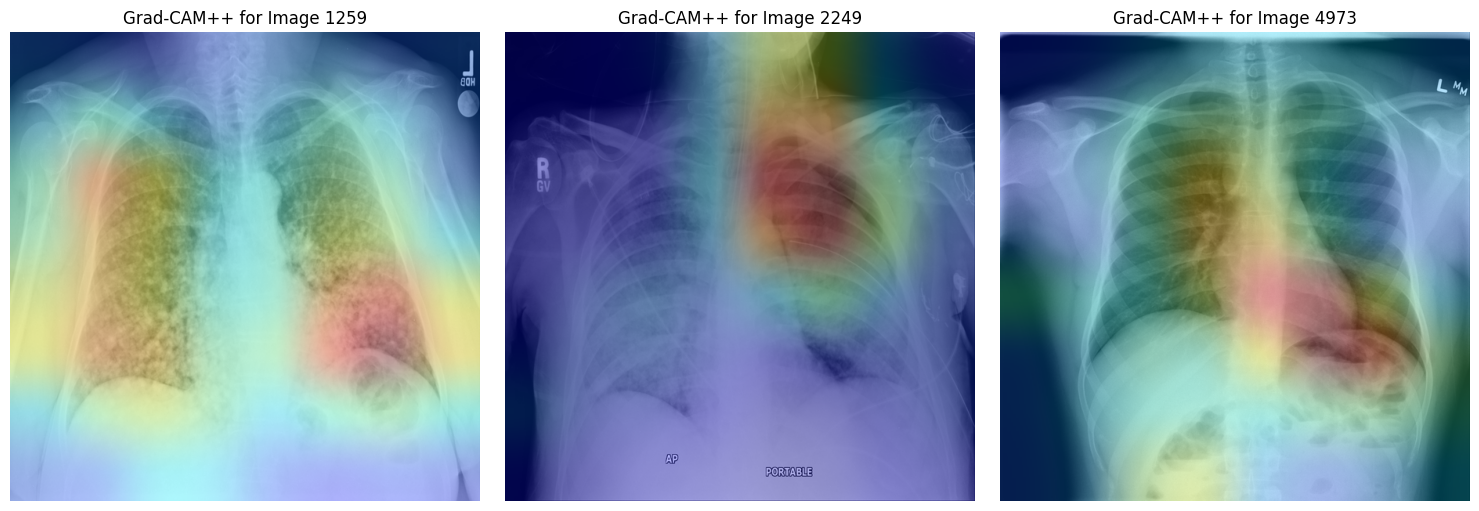

In [ ]:
# --- Step 65: Random Grad-CAM++ Implementation (Side-by-Side Visualization) ---

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import cm

# Function to load and preprocess the image
def get_img_array(img_path, size):
    """
    Loads and preprocesses an image for Grad-CAM++.

    Parameters:
        img_path (str): Path to the image file.
        size (tuple): Target size for resizing the image.

    Returns:
        np.array: Preprocessed image array normalized to [-1, 1].
    """
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0) / 127.5 - 1.0  # Normalize to [-1, 1]
    return array

def make_gradcampp_heatmap(img_array, model, last_conv_layer_name, class_index=None):
    """
    Generates a Grad-CAM++ heatmap for a given image and model.

    Parameters:
        img_array (np.array): Preprocessed image array.
        model (tf.keras.Model): Trained model.
        last_conv_layer_name (str): Name of the last convolutional layer.
        class_index (int, optional): Index of the class for visualization. If None, the model's top prediction is used.

    Returns:
        np.array: Grad-CAM++ heatmap.
    """
    grad_model = tf.keras.models.Model(
        model.input, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if class_index is None:
            class_index = tf.argmax(predictions[0])
        output = predictions[:, class_index]

    grads = tape.gradient(output, conv_outputs)

    first = tf.exp(output) * grads
    second = tf.exp(output) * grads * grads
    third = tf.exp(output) * grads * grads * grads

    alpha_num = second
    alpha_denom = 2.0 * second + tf.reduce_sum(conv_outputs * third, axis=(0, 1, 2))
    alpha_denom = tf.where(alpha_denom != 0.0, alpha_denom, tf.ones_like(alpha_denom))

    alphas = alpha_num / alpha_denom
    weights = tf.reduce_sum(alphas * tf.maximum(grads, 0.0), axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    cam = tf.reduce_sum(tf.maximum(weights, 0.0) * conv_outputs, axis=-1)
    heatmap = tf.maximum(cam, 0) / tf.math.reduce_max(cam)  # Normalize to [0, 1]
    return heatmap.numpy()

# Applying Grad-CAM++ to random test images and displaying side by side
num_samples = 3  # Number of images to visualize
selected_indices = np.random.choice(len(test_image_paths), num_samples, replace=False)

# Name of the last convolutional layer
last_conv_layer_name = 'mixed10'

# Initialize plot
fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

for i, idx in enumerate(selected_indices):
    img_path = os.path.join(consolidated_dir, test_image_paths[idx])
    img_array = get_img_array(img_path, size=(299, 299))

    # Generate Grad-CAM++ heatmap
    heatmap = make_gradcampp_heatmap(img_array, model, last_conv_layer_name)

    # Load original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Apply heatmap
    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * 0.4 + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Display the image
    axes[i].imshow(superimposed_img)
    axes[i].axis('off')
    axes[i].set_title(f'Grad-CAM++ for Image {idx}')

plt.tight_layout()
plt.show()

In [ ]:
# --- Step 66: Save the Trained Model for Future Use ---

# This step saves the trained model in the H5 format, making it ready for future use in production or further analysis.
# The saved file will include:
# 1. The complete architecture of the model (layers and structure).
# 2. The trained weights (parameters learned during training).
# 3. The training configuration (loss function, optimizer, metrics) if needed.
#
# With this saved model, you can:
# - Load it back in any Python environment using TensorFlow's `load_model` function.
# - Use it to make predictions on new images without retraining.
# - Deploy the model in production systems, such as web APIs, mobile apps, or automated pipelines.
#
# This approach ensures that the effort spent on training is preserved, and the model is portable across different systems.
# Example usage after saving:
# ```
# from tensorflow.keras.models import load_model
# model = load_model('final_model.h5')
# predictions = model.predict(new_data)
# ```
# Save the trained model
model.save('final_model.h5')
print("Model saved as 'final_model.h5'")

Model saved as 'final_model.h5'


REUSABLE CELLS

In [ ]:
# --- Step 43: Load and Pre-process Validation Images NORMALIZE images (Custom)---
# This step is responsible for loading and pre-processing the validation images,
# ensuring they are in the correct format for the model.
# Normalization applied: custom normalization to scale pixel values to the range [0, 1] or [-1, 1].

val_images = []  # Initialize an empty list to store the processed images

# Loop over each image in the validation dataset
for img_name in val_image_paths:
    # Construct the full path to the image
    img_path = os.path.join(consolidated_dir, img_name)

    # Load the image, convert it to RGB format, and resize it to the desired model input size.
    img = tf.keras.preprocessing.image.load_img(img_path, color_mode='rgb', target_size=(299, 299))  # Changed to 'rgb' to ensure three channels

    # Convert the image to a numpy array and normalize the pixel values to be between 0 and 1
    #img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    # Convert the image to a numpy array and normalize the pixel values to be between -1 and 1
    img_array = (tf.keras.preprocessing.image.img_to_array(img) / 255.0) * 2 - 1  # Normalization -1 to 1

    # Append the processed image to the list
    val_images.append(img_array)

# Convert the list of images into a numpy array
val_images_rgb = np.array(val_images)

# Check the dimensions of the processed images to ensure everything is loaded correctly
print(f"Shape of validation images: {val_images_rgb.shape}")  # Expected: (num_images, 224, 224, 3)

In [ ]:
# --- Step 58: Binarize Predictions Using a Threshold ---
# Convert predicted probabilities into binary labels using a defined threshold.

import numpy as np

# Define the threshold
threshold = 0.3  # Adjust this value based on optimal threshold or requirements

# Binarize the predictions
y_pred = (y_pred_proba >= threshold).astype(int)

# Display the shape of the binary predictions
print(f"Shape of y_pred: {y_pred.shape}")

Shape of y_pred: (2903, 8)
